# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings


In [ ]:
# Import the libraries you will be using for analysis
!pip install matplotlib==3.10.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Try loading one file
df=pd.read_parquet("/content/drive/My Drive/EDA ASSIGNMENT/2023-1.parquet")
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
df['date']=df.tpep_pickup_datetime.dt.date
df['hour']=df.tpep_pickup_datetime.dt.hour
dates=sorted(df.hour.unique())
df.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...   1.00      0.5        0.00           0.0   
1             1  ...   1.00      0.5        4.00           0.0   
2             1  ...   1.00      0.5       15.00           0.0   
3             1  ...   7.25      0.5        0.00           0.0   
4             1  ...   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

         date hour  
0  2023-01-01    0  
1  2023-01-01    0  
2  2023-01-01    0  
3  2023-01-01    0  
4  2023-01-01    0  

[5 rows x 21 columns]

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             2  ...   1.00      0.5        0.00           0.0   
1             1  ...   1.00      0.5        4.00           0.0   
2             1  ...   1.00      0.5       15.00           0.0   
3             1  ...   7.25      0.5        0.00           0.0   
4             1  ...   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         14.30                   2.5         0.00   
1                    1.0         16.90                   2.5         0.00   
2                    1.0         34.90                   2.5         0.00   
3                    1.0         20.85                   0.0         1.25   
4                    1.0         19.68                   2.5         0.00   

         date hour  
0  2023-01-01    0  
1  2023-01-01    0  
2  2023-01-01    0  
3  2023-01-01    0  
4  2023-01-01    0  

[5 rows x 21 columns]

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year, combining all the monthly data

# Select the folder having data files
import os
# Select the folder having data files
os.chdir("/content/drive/My Drive/EDA ASSIGNMENT/")
# Create a list of all the twelve files to read
file_list = os.listdir()
# initialise an empty dataframe
final_data=pd.DataFrame()
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        df = pd.read_parquet(file_path)
        # Reading the current file
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing the iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
         # creating date and hour column for sampling
        df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
        df['date']=df.tpep_pickup_datetime.dt.date
        df['hour']=df.tpep_pickup_datetime.dt.hour
        dates=sorted(df.date.unique())
        # Loop through dates and then loop through every hour of each date
        for dt in dates:
          date_df=df[df['date']==dt]
            # Iterate through each hour of the selected date
          for hr in range(24):
            # Sample 5% of the hourly data randomly
            # add data of this hour to the dataframe
            hourly_data=date_df[date_df['hour']==hr]
            if not hourly_data.empty:
              datatoadd = hourly_data.sample(frac=0.008, random_state=42)
              # Concatenate the sampled data of all the dates to a single dataframe
              sampled_data=pd.concat([sampled_data,datatoadd],ignore_index=True)
        final_data=pd.concat([final_data,sampled_data],ignore_index=True)

    except FileNotFoundError:
        print(f"File {file_name} not found.")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [ ]:
final_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303397 non-null  int64         
 1   tpep_pickup_datetime   303397 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303397 non-null  datetime64[us]
 3   passenger_count        293215 non-null  float64       
 4   trip_distance          303397 non-null  float64       
 5   RatecodeID             293215 non-null  float64       
 6   store_and_fwd_flag     293215 non-null  object        
 7   PULocationID           303397 non-null  int64         
 8   DOLocationID           303397 non-null  int64         
 9   payment_type           303397 non-null  int64         
 10  fare_amount            303397 non-null  float64       
 11  extra                  303397 non-null  float64       
 12  mta_tax                303397 non-null  floa

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
final_data.to_csv('/content/drive/My Drive/EDA ASS/Final Dataset/final_data.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
df=pd.read_csv('/content/drive/My Drive/EDA ASS/Final Dataset/final_data.csv')


In [ ]:
# df.head()
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1           1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2           2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3           3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4           4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              3.0           1.25         1.0                  N   
1              1.0           5.00         1.0                  N   
2              1.0          24.04         1.0                  N   
3              1.0           0.60         1.0                  N   
4              1.0           0.90         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           234           114  ...      0.5        6.12           0.0   
1            48            87  ...      0.5        0.00           0.0   
2           114           121  ...      0.5        6.00           0.0   
3           246            68  ...      0.5        1.00           0.0   
4           114           148  ...      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         19.72                   2.5          0.0   
1                    1.0         28.30                   2.5          0.0   
2                    1.0        102.20                   2.5          0.0   
3                    1.0         11.80                   2.5          0.0   
4                    1.0         15.45                   2.5          0.0   

         date  hour  airport_fee  
0  2023-02-01     0          NaN  
1  2023-02-01     0          NaN  
2  2023-02-01     0          NaN  
3  2023-02-01     0          NaN  
4  2023-02-01     0          NaN  

[5 rows x 23 columns]

In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             303397 non-null  int64  
 1   VendorID               303397 non-null  int64  
 2   tpep_pickup_datetime   303397 non-null  object 
 3   tpep_dropoff_datetime  303397 non-null  object 
 4   passenger_count        293215 non-null  float64
 5   trip_distance          303397 non-null  float64
 6   RatecodeID             293215 non-null  float64
 7   store_and_fwd_flag     293215 non-null  object 
 8   PULocationID           303397 non-null  int64  
 9   DOLocationID           303397 non-null  int64  
 10  payment_type           303397 non-null  int64  
 11  fare_amount            303397 non-null  float64
 12  extra                  303397 non-null  float64
 13  mta_tax                303397 non-null  float64
 14  tip_amount             303397 non-nu

In [ ]:
df.airport_fee.info()

<class 'pandas.core.series.Series'>
RangeIndex: 303397 entries, 0 to 303396
Series name: airport_fee
Non-Null Count  Dtype  
--------------  -----  
23765 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
df.reset_index(drop=True, inplace=True)
df.tail()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
303392      303392         2  2023-11-30 23:34:28   2023-11-30 23:46:37   
303393      303393         2  2023-11-30 23:13:53   2023-11-30 23:18:32   
303394      303394         2  2023-11-30 23:56:22   2023-12-01 00:00:26   
303395      303395         2  2023-11-30 23:20:47   2023-11-30 23:32:36   
303396      303396         1  2023-11-30 23:30:23   2023-11-30 23:37:07   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
303392              1.0           2.02         1.0                  N   
303393              1.0           1.42         1.0                  N   
303394              1.0           1.05         1.0                  N   
303395              NaN           2.07         NaN                NaN   
303396              1.0           1.00         1.0                  N   

        PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
303392           233           246  ...      0.5        2.00           0.0   
303393            75            74  ...      0.5        2.08           0.0   
303394           239           151  ...      0.5        2.44           0.0   
303395           114           164  ...      0.5        0.00           0.0   
303396           113           144  ...      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
303392                    1.0         20.50                   2.5   
303393                    1.0         12.48                   0.0   
303394                    1.0         14.64                   2.5   
303395                    1.0         21.59                   NaN   
303396                    1.0         12.90                   2.5   

        Airport_fee        date  hour  airport_fee  
303392          0.0  2023-11-30    23          NaN  
303393          0.0  2023-11-30    23          NaN  
303394          0.0  2023-11-30    23          NaN  
303395          NaN  2023-11-30    23          NaN  
303396          0.0  2023-11-30    23          NaN  

[5 rows x 23 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
df.Airport_fee.info()
df.airport_fee.info()


<class 'pandas.core.series.Series'>
RangeIndex: 303397 entries, 0 to 303396
Series name: Airport_fee
Non-Null Count   Dtype  
--------------   -----  
269450 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB
<class 'pandas.core.series.Series'>
RangeIndex: 303397 entries, 0 to 303396
Series name: airport_fee
Non-Null Count  Dtype  
--------------  -----  
23765 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [ ]:
df['Airport_fee']=df['Airport_fee'].fillna(df['airport_fee']) # copying values from duplicate to original


In [ ]:
df=df.drop(columns=['airport_fee']) #dropping the duplicate row

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303397 entries, 0 to 303396
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             303397 non-null  int64  
 1   VendorID               303397 non-null  int64  
 2   tpep_pickup_datetime   303397 non-null  object 
 3   tpep_dropoff_datetime  303397 non-null  object 
 4   passenger_count        293215 non-null  float64
 5   trip_distance          303397 non-null  float64
 6   RatecodeID             293215 non-null  float64
 7   store_and_fwd_flag     293215 non-null  object 
 8   PULocationID           303397 non-null  int64  
 9   DOLocationID           303397 non-null  int64  
 10  payment_type           303397 non-null  int64  
 11  fare_amount            303397 non-null  float64
 12  extra                  303397 non-null  float64
 13  mta_tax                303397 non-null  float64
 14  tip_amount             303397 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
df[df.fare_amount<0]

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

# ***No rows are there with negative fare. So we can proceed further***

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
df.RatecodeID.describe()
df.RatecodeID.unique()

array([ 1.,  2., nan, 99.,  5.,  4.,  3.])

In [ ]:
# Find which columns have negative values
df.describe()
#extra, mta_tax,improvemt_surcharge, Total_amount, Congestion_surcharge, Airport_fee having the negative values.

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  303397.000000  303397.000000    293215.000000   303397.00000   
mean   151698.000000       1.733745         1.366970        3.55859   
std     87583.314148       0.447484         0.890697       45.48573   
min         0.000000       1.000000         0.000000        0.00000   
25%     75849.000000       1.000000         1.000000        1.05000   
50%    151698.000000       2.000000         1.000000        1.80000   
75%    227547.000000       2.000000         1.000000        3.40000   
max    303396.000000       6.000000         9.000000    22528.82000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  293215.000000  303397.000000  303397.000000  303397.000000   
mean        1.651300     165.251924     163.911871       1.164781   
std         7.503493      64.054580      69.795454       0.507151   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  303397.000000  303397.000000  303397.000000  303397.000000   
mean       20.280354       1.584759       0.495326       3.543435   
std       260.510055       1.822959       0.048375       4.046205   
min         0.000000      -2.500000      -0.500000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max    143163.450000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  303397.000000          303397.000000  303397.000000   
mean        0.590625               0.998974      29.331403   
std         2.173184               0.030897     260.857909   
min         0.000000              -1.000000      -4.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         293215.000000  293215.000000  303397.000000  
mean               2.308605       0.141998      14.265256  
std                0.664916       0.463270       5.807113  
min               -2.500000      -1.750000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
# fix these negative values
for col in ('extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'):
  df[col]=df[col].abs()


In [ ]:
df.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  303397.000000  303397.000000    293215.000000   303397.00000   
mean   151698.000000       1.733745         1.366970        3.55859   
std     87583.314148       0.447484         0.890697       45.48573   
min         0.000000       1.000000         0.000000        0.00000   
25%     75849.000000       1.000000         1.000000        1.05000   
50%    151698.000000       2.000000         1.000000        1.80000   
75%    227547.000000       2.000000         1.000000        3.40000   
max    303396.000000       6.000000         9.000000    22528.82000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  293215.000000  303397.000000  303397.000000  303397.000000   
mean        1.651300     165.251924     163.911871       1.164781   
std         7.503493      64.054580      69.795454       0.507151   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  303397.000000  303397.000000  303397.000000  303397.000000   
mean       20.280354       1.584776       0.495362       3.543435   
std       260.510055       1.822945       0.048002       4.046205   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max    143163.450000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  303397.000000          303397.000000  303397.000000   
mean        0.590625               0.999047      29.331633   
std         2.173184               0.028455     260.857883   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         293215.000000  293215.000000  303397.000000  
mean               2.308707       0.142022      14.265256  
std                0.664561       0.463262       5.807113  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1           1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2           2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3           3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4           4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              3.0           1.25         1.0                  N   
1              1.0           5.00         1.0                  N   
2              1.0          24.04         1.0                  N   
3              1.0           0.60         1.0                  N   
4              1.0           0.90         1.0                  N   

   PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  tolls_amount  \
0           234           114  ...    1.0      0.5        6.12           0.0   
1            48            87  ...    3.5      0.5        0.00           0.0   
2           114           121  ...    1.0      0.5        6.00           0.0   
3           246            68  ...    3.5      0.5        1.00           0.0   
4           114           148  ...    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         19.72                   2.5          0.0   
1                    1.0         28.30                   2.5          0.0   
2                    1.0        102.20                   2.5          0.0   
3                    1.0         11.80                   2.5          0.0   
4                    1.0         15.45                   2.5          0.0   

         date  hour  
0  2023-02-01     0  
1  2023-02-01     0  
2  2023-02-01     0  
3  2023-02-01     0  
4  2023-02-01     0  

[5 rows x 22 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean()
missing_proportion



Unnamed: 0               0.00000
VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.03356
trip_distance            0.00000
RatecodeID               0.03356
store_and_fwd_flag       0.03356
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     0.03356
Airport_fee              0.03356
date                     0.00000
hour                     0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
df[df['passenger_count'].isnull()]



Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
14              14         2  2023-02-01 01:46:13   2023-02-01 01:59:11   
24              24         1  2023-02-01 05:28:00   2023-02-01 05:33:34   
38              38         2  2023-02-01 06:57:26   2023-02-01 07:04:46   
46              46         2  2023-02-01 07:57:51   2023-02-01 08:23:13   
63              63         2  2023-02-01 07:51:43   2023-02-01 08:03:48   
...            ...       ...                  ...                   ...   
303345      303345         2  2023-11-30 23:02:25   2023-11-30 23:17:41   
303356      303356         2  2023-11-30 23:37:00   2023-12-01 00:07:00   
303376      303376         1  2023-11-30 23:57:07   2023-12-01 00:08:00   
303388      303388         2  2023-11-30 23:36:36   2023-11-30 23:42:17   
303395      303395         2  2023-11-30 23:20:47   2023-11-30 23:32:36   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
14                  NaN           2.98         NaN                NaN   
24                  NaN           1.40         NaN                NaN   
38                  NaN           3.87         NaN                NaN   
46                  NaN           4.05         NaN                NaN   
63                  NaN           2.13         NaN                NaN   
...                 ...            ...         ...                ...   
303345              NaN           3.06         NaN                NaN   
303356              NaN           7.86         NaN                NaN   
303376              NaN           0.00         NaN                NaN   
303388              NaN           0.86         NaN                NaN   
303395              NaN           2.07         NaN                NaN   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
14               114            33  ...    0.0      0.5        5.15   
24               141           162  ...    1.0      0.5        2.72   
38                75           179  ...    0.0      0.5        4.28   
46               239           234  ...    0.0      0.5        3.94   
63               143           246  ...    0.0      0.5        3.94   
...              ...           ...  ...    ...      ...         ...   
303345            68           231  ...    0.0      0.5        0.00   
303356            48           243  ...    0.0      0.5        5.00   
303376           161           143  ...    0.0      0.5        0.00   
303388           232            79  ...    0.0      0.5        0.00   
303395           114           164  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
14              0.00                    1.0         30.92   
24              0.00                    1.0         16.32   
38              6.55                    1.0         32.78   
46              0.00                    1.0         30.18   
63              0.00                    1.0         23.63   
...              ...                    ...           ...   
303345          0.00                    1.0         26.85   
303356          0.00                    1.0         40.27   
303376          0.00                    1.0         15.79   
303388          0.00                    1.0         12.08   
303395          0.00                    1.0         21.59   

        congestion_surcharge  Airport_fee        date  hour  
14                       NaN          NaN  2023-02-01     1  
24                       NaN          NaN  2023-02-01     5  
38                       NaN          NaN  2023-02-01     6  
46                       NaN          NaN  2023-02-01     7  
63                       NaN          NaN  2023-02-01     7  
...                      ...          ...         ...   ...  
303345                   NaN          NaN  2023-11-30    23  
303356                   NaN          NaN  2023-11-30    23  
303376                   NaN          NaN  2023-11-30    23  
303388                  

In [ ]:
# Impute NaN values in 'passenger_count'
df.passenger_count=df.passenger_count.fillna(1)

In [ ]:
df[df['passenger_count'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isnull()]

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
14              14         2  2023-02-01 01:46:13   2023-02-01 01:59:11   
24              24         1  2023-02-01 05:28:00   2023-02-01 05:33:34   
38              38         2  2023-02-01 06:57:26   2023-02-01 07:04:46   
46              46         2  2023-02-01 07:57:51   2023-02-01 08:23:13   
63              63         2  2023-02-01 07:51:43   2023-02-01 08:03:48   
...            ...       ...                  ...                   ...   
303345      303345         2  2023-11-30 23:02:25   2023-11-30 23:17:41   
303356      303356         2  2023-11-30 23:37:00   2023-12-01 00:07:00   
303376      303376         1  2023-11-30 23:57:07   2023-12-01 00:08:00   
303388      303388         2  2023-11-30 23:36:36   2023-11-30 23:42:17   
303395      303395         2  2023-11-30 23:20:47   2023-11-30 23:32:36   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
14                  1.0           2.98         NaN                NaN   
24                  1.0           1.40         NaN                NaN   
38                  1.0           3.87         NaN                NaN   
46                  1.0           4.05         NaN                NaN   
63                  1.0           2.13         NaN                NaN   
...                 ...            ...         ...                ...   
303345              1.0           3.06         NaN                NaN   
303356              1.0           7.86         NaN                NaN   
303376              1.0           0.00         NaN                NaN   
303388              1.0           0.86         NaN                NaN   
303395              1.0           2.07         NaN                NaN   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
14               114            33  ...    0.0      0.5        5.15   
24               141           162  ...    1.0      0.5        2.72   
38                75           179  ...    0.0      0.5        4.28   
46               239           234  ...    0.0      0.5        3.94   
63               143           246  ...    0.0      0.5        3.94   
...              ...           ...  ...    ...      ...         ...   
303345            68           231  ...    0.0      0.5        0.00   
303356            48           243  ...    0.0      0.5        5.00   
303376           161           143  ...    0.0      0.5        0.00   
303388           232            79  ...    0.0      0.5        0.00   
303395           114           164  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
14              0.00                    1.0         30.92   
24              0.00                    1.0         16.32   
38              6.55                    1.0         32.78   
46              0.00                    1.0         30.18   
63              0.00                    1.0         23.63   
...              ...                    ...           ...   
303345          0.00                    1.0         26.85   
303356          0.00                    1.0         40.27   
303376          0.00                    1.0         15.79   
303388          0.00                    1.0         12.08   
303395          0.00                    1.0         21.59   

        congestion_surcharge  Airport_fee        date  hour  
14                       NaN          NaN  2023-02-01     1  
24                       NaN          NaN  2023-02-01     5  
38                       NaN          NaN  2023-02-01     6  
46                       NaN          NaN  2023-02-01     7  
63                       NaN          NaN  2023-02-01     7  
...                      ...          ...         ...   ...  
303345                   NaN          NaN  2023-11-30    23  
303356                   NaN          NaN  2023-11-30    23  
303376                   NaN          NaN  2023-11-30    23  
303388                  

In [ ]:
df.RatecodeID=df.RatecodeID.fillna(1)

In [ ]:
df[df['RatecodeID'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
# checking for null values
df[df['congestion_surcharge'].isnull()]

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
14              14         2  2023-02-01 01:46:13   2023-02-01 01:59:11   
24              24         1  2023-02-01 05:28:00   2023-02-01 05:33:34   
38              38         2  2023-02-01 06:57:26   2023-02-01 07:04:46   
46              46         2  2023-02-01 07:57:51   2023-02-01 08:23:13   
63              63         2  2023-02-01 07:51:43   2023-02-01 08:03:48   
...            ...       ...                  ...                   ...   
303345      303345         2  2023-11-30 23:02:25   2023-11-30 23:17:41   
303356      303356         2  2023-11-30 23:37:00   2023-12-01 00:07:00   
303376      303376         1  2023-11-30 23:57:07   2023-12-01 00:08:00   
303388      303388         2  2023-11-30 23:36:36   2023-11-30 23:42:17   
303395      303395         2  2023-11-30 23:20:47   2023-11-30 23:32:36   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
14                  1.0           2.98         1.0                NaN   
24                  1.0           1.40         1.0                NaN   
38                  1.0           3.87         1.0                NaN   
46                  1.0           4.05         1.0                NaN   
63                  1.0           2.13         1.0                NaN   
...                 ...            ...         ...                ...   
303345              1.0           3.06         1.0                NaN   
303356              1.0           7.86         1.0                NaN   
303376              1.0           0.00         1.0                NaN   
303388              1.0           0.86         1.0                NaN   
303395              1.0           2.07         1.0                NaN   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
14               114            33  ...    0.0      0.5        5.15   
24               141           162  ...    1.0      0.5        2.72   
38                75           179  ...    0.0      0.5        4.28   
46               239           234  ...    0.0      0.5        3.94   
63               143           246  ...    0.0      0.5        3.94   
...              ...           ...  ...    ...      ...         ...   
303345            68           231  ...    0.0      0.5        0.00   
303356            48           243  ...    0.0      0.5        5.00   
303376           161           143  ...    0.0      0.5        0.00   
303388           232            79  ...    0.0      0.5        0.00   
303395           114           164  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
14              0.00                    1.0         30.92   
24              0.00                    1.0         16.32   
38              6.55                    1.0         32.78   
46              0.00                    1.0         30.18   
63              0.00                    1.0         23.63   
...              ...                    ...           ...   
303345          0.00                    1.0         26.85   
303356          0.00                    1.0         40.27   
303376          0.00                    1.0         15.79   
303388          0.00                    1.0         12.08   
303395          0.00                    1.0         21.59   

        congestion_surcharge  Airport_fee        date  hour  
14                       NaN          NaN  2023-02-01     1  
24                       NaN          NaN  2023-02-01     5  
38                       NaN          NaN  2023-02-01     6  
46                       NaN          NaN  2023-02-01     7  
63                       NaN          NaN  2023-02-01     7  
...                      ...          ...         ...   ...  
303345                   NaN          NaN  2023-11-30    23  
303356                   NaN          NaN  2023-11-30    23  
303376                   NaN          NaN  2023-11-30    23  
303388                  

In [ ]:
# Replacing surcharges with 0
df.congestion_surcharge=df.congestion_surcharge.fillna(0)

In [ ]:
# Recheck for null values
df[df['congestion_surcharge'].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour]
Index: []

[0 rows x 22 columns]

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df.isnull().sum()

Unnamed: 0                   0
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       10182
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee              10182
date                         0
hour                         0
dtype: int64

In [ ]:
#handling Airport_fee column
df.Airport_fee=df.Airport_fee.fillna(0)

In [ ]:
#Handling store_and_forward_flag
df.store_and_fwd_flag=df.store_and_fwd_flag.fillna('N')

In [ ]:
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
date                     0
hour                     0
dtype: int64

# ***All null rows are filed so far. Lets proceed***

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  303397.000000  303397.000000    303397.000000   303397.00000   
mean   151698.000000       1.733745         1.354654        3.55859   
std     87583.314148       0.447484         0.878114       45.48573   
min         0.000000       1.000000         0.000000        0.00000   
25%     75849.000000       1.000000         1.000000        1.05000   
50%    151698.000000       2.000000         1.000000        1.80000   
75%    227547.000000       2.000000         1.000000        3.40000   
max    303396.000000       6.000000         9.000000    22528.82000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  303397.000000  303397.000000  303397.000000  303397.000000   
mean        1.629443     165.251924     163.911871       1.164781   
std         7.377442      64.054580      69.795454       0.507151   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  303397.000000  303397.000000  303397.000000  303397.000000   
mean       20.280354       1.584776       0.495362       3.543435   
std       260.510055       1.822945       0.048002       4.046205   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max    143163.450000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  303397.000000          303397.000000  303397.000000   
mean        0.590625               0.999047      29.331633   
std         2.173184               0.028455     260.857883   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         303397.000000  303397.000000  303397.000000  
mean               2.231227       0.137256      14.265256  
std                0.774400       0.456140       5.807113  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6 and removing 7 passenger count also
df=df[df['passenger_count']<=6]
df.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  303392.000000  303392.000000    303392.000000  303392.000000   
mean   151698.588509       1.733741         1.354548       3.558489   
std     87582.823102       0.447487         0.877726      45.486069   
min         0.000000       1.000000         0.000000       0.000000   
25%     75850.750000       1.000000         1.000000       1.050000   
50%    151698.500000       2.000000         1.000000       1.800000   
75%    227547.250000       2.000000         1.000000       3.400000   
max    303396.000000       6.000000         6.000000   22528.820000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  303392.000000  303392.000000  303392.000000  303392.000000   
mean        1.629387     165.252324     163.911721       1.164784   
std         7.377490      64.054343      69.794859       0.507154   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  303392.000000  303392.000000  303392.000000  303392.000000   
mean       20.279304       1.584802       0.495365       3.543385   
std       260.512072       1.822949       0.047986       4.046126   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.840000   
75%        21.900000       2.500000       0.500000       4.420000   
max    143163.450000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  303392.000000          303392.000000  303392.000000   
mean        0.590479               0.999047      29.330431   
std         2.172641               0.028456     260.859855   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.960000   
50%         0.000000               1.000000      21.000000   
75%         0.000000               1.000000      30.800000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         303392.000000  303392.000000  303392.000000  
mean               2.231247       0.137258      14.265356  
std                0.774375       0.456144       5.807050  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Removing rows with passenger count as 0
df=df[~(df.passenger_count==0)]


In [ ]:
# Removing Entries where trip_distance is nearly 0 and fare_amount is more than 300
df=df[~((df.trip_distance<=0.5) & (df.fare_amount>300))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298732 entries, 0 to 303396
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             298732 non-null  int64  
 1   VendorID               298732 non-null  int64  
 2   tpep_pickup_datetime   298732 non-null  object 
 3   tpep_dropoff_datetime  298732 non-null  object 
 4   passenger_count        298732 non-null  float64
 5   trip_distance          298732 non-null  float64
 6   RatecodeID             298732 non-null  float64
 7   store_and_fwd_flag     298732 non-null  object 
 8   PULocationID           298732 non-null  int64  
 9   DOLocationID           298732 non-null  int64  
 10  payment_type           298732 non-null  int64  
 11  fare_amount            298732 non-null  float64
 12  extra                  298732 non-null  float64
 13  mta_tax                298732 non-null  float64
 14  tip_amount             298732 non-null  f

In [ ]:
df=df[~((df.trip_distance==0) & (df.fare_amount==0))]
df.describe()

Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  298686.000000  298686.00000    298686.000000  298686.000000   
mean   151770.046815       1.74516         1.375669       3.571942   
std     87624.650698       0.44142         0.867946      45.840471   
min         0.000000       1.00000         1.000000       0.000000   
25%     75841.250000       1.00000         1.000000       1.050000   
50%    151816.500000       2.00000         1.000000       1.800000   
75%    227696.750000       2.00000         1.000000       3.400000   
max    303396.000000       6.00000         6.000000   22528.820000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  298686.000000  298686.000000  298686.000000  298686.000000   
mean        1.636163     165.197154     163.858731       1.163258   
std         7.422025      64.064869      69.814179       0.506516   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  298686.000000  298686.000000  298686.000000  298686.000000   
mean       20.321782       1.558997       0.495427       3.551694   
std       262.537588       1.815236       0.047663       4.049982   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.850000   
75%        21.900000       2.500000       0.500000       4.440000   
max    143163.450000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  298686.000000          298686.000000  298686.000000   
mean        0.594130               0.999161      29.388079   
std         2.179262               0.026341     262.884188   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.990000   
50%         0.000000               1.000000      21.100000   
75%         0.000000               1.000000      30.900000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         298686.000000  298686.000000  298686.000000  
mean               2.230135       0.137979      14.269668  
std                0.775782       0.457245       5.813993  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
df=df[df.trip_distance<250]

In [ ]:
df.describe()

Unnamed: 0       VendorID  passenger_count  trip_distance  \
count  298683.000000  298683.000000    298683.000000  298683.000000   
mean   151770.761185       1.745158         1.375673       3.446564   
std     87624.301113       0.441422         0.867949       4.523944   
min         0.000000       1.000000         1.000000       0.000000   
25%     75842.500000       1.000000         1.000000       1.050000   
50%    151817.000000       2.000000         1.000000       1.800000   
75%    227697.500000       2.000000         1.000000       3.400000   
max    303396.000000       6.000000         6.000000     187.350000   

          RatecodeID   PULocationID   DOLocationID   payment_type  \
count  298683.000000  298683.000000  298683.000000  298683.000000   
mean        1.636169     165.197005     163.858017       1.163270   
std         7.422062      64.064977      69.814164       0.506505   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000     132.000000     113.000000       1.000000   
50%         1.000000     162.000000     162.000000       1.000000   
75%         1.000000     234.000000     234.000000       1.000000   
max        99.000000     265.000000     265.000000       4.000000   

         fare_amount          extra        mta_tax     tip_amount  \
count  298683.000000  298683.000000  298683.000000  298683.000000   
mean       20.321829       1.559012       0.495427       3.551714   
std       262.538906       1.815238       0.047663       4.049993   
min         0.000000       0.000000       0.000000       0.000000   
25%         9.300000       0.000000       0.500000       1.000000   
50%        13.500000       1.000000       0.500000       2.850000   
75%        21.900000       2.500000       0.500000       4.440000   
max    143163.450000      14.250000       0.800000     150.290000   

        tolls_amount  improvement_surcharge   total_amount  \
count  298683.000000          298683.000000  298683.000000   
mean        0.594136               0.999161      29.388162   
std         2.179272               0.026341     262.885507   
min         0.000000               0.000000       0.000000   
25%         0.000000               1.000000      15.990000   
50%         0.000000               1.000000      21.100000   
75%         0.000000               1.000000      30.900000   
max       143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         298683.000000  298683.000000  298683.000000  
mean               2.230157       0.137980      14.269684  
std                0.775754       0.457247       5.813982  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
df=df[df.payment_type!=0]
df.tail()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
303391      303391         2  2023-11-30 23:42:17   2023-11-30 23:54:19   
303392      303392         2  2023-11-30 23:34:28   2023-11-30 23:46:37   
303393      303393         2  2023-11-30 23:13:53   2023-11-30 23:18:32   
303394      303394         2  2023-11-30 23:56:22   2023-12-01 00:00:26   
303396      303396         1  2023-11-30 23:30:23   2023-11-30 23:37:07   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
303391              1.0           3.05         1.0                  N   
303392              1.0           2.02         1.0                  N   
303393              1.0           1.42         1.0                  N   
303394              1.0           1.05         1.0                  N   
303396              1.0           1.00         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
303391            68           163  ...    1.0      0.5        0.00   
303392           233           246  ...    1.0      0.5        2.00   
303393            75            74  ...    1.0      0.5        2.08   
303394           239           151  ...    1.0      0.5        2.44   
303396           113           144  ...    3.5      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
303391           0.0                    1.0         20.60   
303392           0.0                    1.0         20.50   
303393           0.0                    1.0         12.48   
303394           0.0                    1.0         14.64   
303396           0.0                    1.0         12.90   

        congestion_surcharge  Airport_fee        date  hour  
303391                   2.5          0.0  2023-11-30    23  
303392                   2.5          0.0  2023-11-30    23  
303393                   0.0          0.0  2023-11-30    23  
303394                   2.5          0.0  2023-11-30    23  
303396                   2.5          0.0  2023-11-30    23  

[5 rows x 22 columns]

In [ ]:
df.reset_index(inplace=True)
df.describe()

index     Unnamed: 0       VendorID  passenger_count  \
count  288507.000000  288507.000000  288507.000000    288507.000000   
mean   151437.577390  151437.577390       1.748928         1.388923   
std     87532.651445   87532.651445       0.433631         0.880201   
min         0.000000       0.000000       1.000000         1.000000   
25%     75798.500000   75798.500000       1.000000         1.000000   
50%    151154.000000  151154.000000       2.000000         1.000000   
75%    227010.500000  227010.500000       2.000000         1.000000   
max    303396.000000  303396.000000       2.000000         6.000000   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count   288507.00000  288507.000000  288507.000000  288507.000000   
mean         3.44815       1.658608     165.355887     164.132350   
std          4.53424       7.550842      63.756167      69.768865   
min          0.00000       1.000000       1.000000       1.000000   
25%          1.06000       1.000000     132.000000     113.000000   
50%          1.79000       1.000000     162.000000     162.000000   
75%          3.38000       1.000000     234.000000     234.000000   
max        187.35000      99.000000     265.000000     265.000000   

        payment_type    fare_amount          extra        mta_tax  \
count  288507.000000  288507.000000  288507.000000  288507.000000   
mean        1.204300      20.248701       1.608079       0.495474   
std         0.464955     267.115470       1.822606       0.047424   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       9.300000       0.000000       0.500000   
50%         1.000000      13.500000       1.000000       0.500000   
75%         1.000000      21.900000       2.500000       0.500000   
max         4.000000  143163.450000      14.250000       0.800000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  288507.000000  288507.000000          288507.000000  288507.000000   
mean        3.580624       0.593787               0.999443      29.378842   
std         4.067448       2.176588               0.021522     267.461352   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.860000       0.000000               1.000000      21.000000   
75%         4.450000       0.000000               1.000000      30.700000   
max       150.290000     143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         288507.000000  288507.000000  288507.000000  
mean               2.308817       0.142847      14.304006  
std                0.664385       0.464493       5.781235  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Removing all the entries with not matching RatecodeID
df=df[df.RatecodeID<=6]
df.describe()

index     Unnamed: 0       VendorID  passenger_count  \
count  286786.000000  286786.000000  286786.000000     286786.00000   
mean   151388.779721  151388.779721       1.753422          1.39125   
std     87528.013826   87528.013826       0.431019          0.88232   
min         0.000000       0.000000       1.000000          1.00000   
25%     75762.250000   75762.250000       2.000000          1.00000   
50%    151084.500000  151084.500000       2.000000          1.00000   
75%    226933.750000  226933.750000       2.000000          1.00000   
max    303396.000000  303396.000000       2.000000          6.00000   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  286786.000000  286786.000000  286786.000000  286786.000000   
mean        3.428937       1.074463     165.584659     164.341554   
std         4.518848       0.393041      63.619938      69.688570   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.060000       1.000000     132.000000     114.000000   
50%         1.780000       1.000000     162.000000     162.000000   
75%         3.350000       1.000000     234.000000     234.000000   
max       187.350000       5.000000     265.000000     265.000000   

        payment_type    fare_amount          extra        mta_tax  \
count  286786.000000  286786.000000  286786.000000  286786.000000   
mean        1.205526      20.171677       1.617713       0.495450   
std         0.466078     267.911723       1.823798       0.047547   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       9.300000       0.000000       0.500000   
50%         1.000000      13.500000       1.000000       0.500000   
75%         1.000000      21.900000       2.500000       0.500000   
max         4.000000  143163.450000      14.250000       0.800000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  286786.000000  286786.000000          286786.000000  286786.000000   
mean        3.602112       0.587857               0.999447      29.338109   
std         4.070137       2.164479               0.021424     268.259268   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.880000       0.000000               1.000000      21.000000   
75%         4.480000       0.000000               1.000000      30.600000   
max       150.290000     143.000000               1.000000  143167.450000   

       congestion_surcharge    Airport_fee           hour  
count         286786.000000  286786.000000  286786.000000  
mean               2.322673       0.143704      14.323161  
std                0.641775       0.465753       5.783918  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Removing the fare_amount where the amount is very high
df=df[df.fare_amount<=500]
df.describe()

index     Unnamed: 0       VendorID  passenger_count  \
count  286785.000000  286785.000000  286785.000000    286785.000000   
mean   151389.217508  151389.217508       1.753425         1.391251   
std     87527.852444   87527.852444       0.431018         0.882321   
min         0.000000       0.000000       1.000000         1.000000   
25%     75763.000000   75763.000000       2.000000         1.000000   
50%    151085.000000  151085.000000       2.000000         1.000000   
75%    226934.000000  226934.000000       2.000000         1.000000   
max    303396.000000  303396.000000       2.000000         6.000000   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  286785.000000  286785.000000  286785.000000  286785.000000   
mean        3.428946       1.074463     165.584368     164.341814   
std         4.518853       0.393041      63.619859      69.688554   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.060000       1.000000     132.000000     114.000000   
50%         1.780000       1.000000     162.000000     162.000000   
75%         3.350000       1.000000     234.000000     234.000000   
max       187.350000       5.000000     265.000000     265.000000   

        payment_type    fare_amount         extra        mta_tax  \
count  286785.000000  286785.000000  286785.00000  286785.000000   
mean        1.205523      19.672546       1.61771       0.495450   
std         0.466076      18.143826       1.82380       0.047547   
min         1.000000       0.000000       0.00000       0.000000   
25%         1.000000       9.300000       0.00000       0.500000   
50%         1.000000      13.500000       1.00000       0.500000   
75%         1.000000      21.900000       2.50000       0.500000   
max         4.000000     455.200000      14.25000       0.800000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  286785.000000  286785.000000          286785.000000  286785.000000   
mean        3.602124       0.587859               0.999447      28.838996   
std         4.070138       2.164482               0.021424      22.818848   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.880000       0.000000               1.000000      21.000000   
75%         4.480000       0.000000               1.000000      30.600000   
max       150.290000     143.000000               1.000000     488.700000   

       congestion_surcharge    Airport_fee           hour  
count         286785.000000  286785.000000  286785.000000  
mean               2.322672       0.143704      14.323176  
std                0.641776       0.465753       5.783923  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Removing the entries where the tip amount is more than the fare amount.
df=df[df.tip_amount<df.fare_amount]
df.describe()

index     Unnamed: 0       VendorID  passenger_count  \
count  286315.000000  286315.000000  286315.000000    286315.000000   
mean   151390.261205  151390.261205       1.753509         1.391398   
std     87527.911113   87527.911113       0.430968         0.882517   
min         0.000000       0.000000       1.000000         1.000000   
25%     75764.500000   75764.500000       2.000000         1.000000   
50%    151095.000000  151095.000000       2.000000         1.000000   
75%    226937.500000  226937.500000       2.000000         1.000000   
max    303396.000000  303396.000000       2.000000         6.000000   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  286315.000000  286315.000000  286315.000000  286315.000000   
mean        3.430780       1.074174     165.594426     164.341694   
std         4.517093       0.391588      63.612280      69.685757   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.060000       1.000000     132.000000     114.000000   
50%         1.790000       1.000000     162.000000     162.000000   
75%         3.350000       1.000000     234.000000     234.000000   
max       187.350000       5.000000     265.000000     265.000000   

        payment_type    fare_amount          extra        mta_tax  \
count  286315.000000  286315.000000  286315.000000  286315.000000   
mean        1.205557      19.688440       1.618181       0.495505   
std         0.465818      18.146571       1.824174       0.047260   
min         1.000000       0.010000       0.000000       0.000000   
25%         1.000000       9.300000       0.000000       0.500000   
50%         1.000000      13.500000       1.000000       0.500000   
75%         1.000000      21.900000       2.500000       0.500000   
max         4.000000     455.200000      14.250000       0.800000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  286315.000000  286315.000000          286315.000000  286315.000000   
mean        3.576283       0.587343               0.999481      28.829634   
std         3.929375       2.144809               0.020612      22.797139   
min         0.000000       0.000000               0.000000       1.010000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.860000       0.000000               1.000000      21.000000   
75%         4.470000       0.000000               1.000000      30.600000   
max       103.840000      50.000000               1.000000     488.700000   

       congestion_surcharge    Airport_fee           hour  
count         286315.000000  286315.000000  286315.000000  
mean               2.323245       0.143734      14.325051  
std                0.640817       0.465794       5.782459  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Removing the entries with tolls_amount are high but the distance is less
df=df[~((df.tolls_amount>30) & (df.trip_distance<50))]
df.describe()

index     Unnamed: 0       VendorID  passenger_count  \
count  286289.000000  286289.000000  286289.000000    286289.000000   
mean   151390.473256  151390.473256       1.753529         1.391377   
std     87527.700360   87527.700360       0.430957         0.882507   
min         0.000000       0.000000       1.000000         1.000000   
25%     75765.000000   75765.000000       2.000000         1.000000   
50%    151096.000000  151096.000000       2.000000         1.000000   
75%    226935.000000  226935.000000       2.000000         1.000000   
max    303396.000000  303396.000000       2.000000         6.000000   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  286289.000000  286289.000000  286289.000000  286289.000000   
mean        3.428756       1.074006     165.595035     164.345811   
std         4.510889       0.391023      63.613212      69.676808   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.060000       1.000000     132.000000     114.000000   
50%         1.790000       1.000000     162.000000     162.000000   
75%         3.350000       1.000000     234.000000     234.000000   
max       187.350000       5.000000     265.000000     265.000000   

        payment_type    fare_amount          extra        mta_tax  \
count  286289.000000  286289.000000  286289.000000  286289.000000   
mean        1.205544      19.679697       1.618215       0.495536   
std         0.465785      18.118833       1.824146       0.047099   
min         1.000000       0.010000       0.000000       0.000000   
25%         1.000000       9.300000       0.000000       0.500000   
50%         1.000000      13.500000       1.000000       0.500000   
75%         1.000000      21.900000       2.500000       0.500000   
max         4.000000     455.200000      14.250000       0.800000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  286289.000000  286289.000000          286289.000000  286289.000000   
mean        3.574881       0.584013               0.999481      28.816326   
std         3.923670       2.115667               0.020613      22.749382   
min         0.000000       0.000000               0.000000       1.010000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.860000       0.000000               1.000000      21.000000   
75%         4.470000       0.000000               1.000000      30.600000   
max       103.840000      36.690000               1.000000     488.700000   

       congestion_surcharge    Airport_fee           hour  
count         286289.000000  286289.000000  286289.000000  
mean               2.323387       0.143701      14.325192  
std                0.640580       0.465753       5.782457  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Checking if the fare_amount is greater than total_amount
df[df.fare_amount>df.total_amount]
df.describe()

index     Unnamed: 0       VendorID  passenger_count  \
count  286289.000000  286289.000000  286289.000000    286289.000000   
mean   151390.473256  151390.473256       1.753529         1.391377   
std     87527.700360   87527.700360       0.430957         0.882507   
min         0.000000       0.000000       1.000000         1.000000   
25%     75765.000000   75765.000000       2.000000         1.000000   
50%    151096.000000  151096.000000       2.000000         1.000000   
75%    226935.000000  226935.000000       2.000000         1.000000   
max    303396.000000  303396.000000       2.000000         6.000000   

       trip_distance     RatecodeID   PULocationID   DOLocationID  \
count  286289.000000  286289.000000  286289.000000  286289.000000   
mean        3.428756       1.074006     165.595035     164.345811   
std         4.510889       0.391023      63.613212      69.676808   
min         0.000000       1.000000       1.000000       1.000000   
25%         1.060000       1.000000     132.000000     114.000000   
50%         1.790000       1.000000     162.000000     162.000000   
75%         3.350000       1.000000     234.000000     234.000000   
max       187.350000       5.000000     265.000000     265.000000   

        payment_type    fare_amount          extra        mta_tax  \
count  286289.000000  286289.000000  286289.000000  286289.000000   
mean        1.205544      19.679697       1.618215       0.495536   
std         0.465785      18.118833       1.824146       0.047099   
min         1.000000       0.010000       0.000000       0.000000   
25%         1.000000       9.300000       0.000000       0.500000   
50%         1.000000      13.500000       1.000000       0.500000   
75%         1.000000      21.900000       2.500000       0.500000   
max         4.000000     455.200000      14.250000       0.800000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  286289.000000  286289.000000          286289.000000  286289.000000   
mean        3.574881       0.584013               0.999481      28.816326   
std         3.923670       2.115667               0.020613      22.749382   
min         0.000000       0.000000               0.000000       1.010000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.860000       0.000000               1.000000      21.000000   
75%         4.470000       0.000000               1.000000      30.600000   
max       103.840000      36.690000               1.000000     488.700000   

       congestion_surcharge    Airport_fee           hour  
count         286289.000000  286289.000000  286289.000000  
mean               2.323387       0.143701      14.325192  
std                0.640580       0.465753       5.782457  
min                0.000000       0.000000       0.000000  
25%                2.500000       0.000000      11.000000  
50%                2.500000       0.000000      15.000000  
75%                2.500000       0.000000      19.000000  
max                2.500000       1.750000      23.000000

In [ ]:
#Removing rows where dropoff time is same or less than the pickup time as it is not correct
df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
df=df[df.tpep_dropoff_datetime>df.tpep_pickup_datetime]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(columns=['index','Unnamed: 0','level_0'],inplace=True)
df.tail()

<ipython-input-58-e2d4d9ee21e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index','Unnamed: 0','level_0'],inplace=True)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
286175         2  2023-11-30 23:42:17   2023-11-30 23:54:19              1.0   
286176         2  2023-11-30 23:34:28   2023-11-30 23:46:37              1.0   
286177         2  2023-11-30 23:13:53   2023-11-30 23:18:32              1.0   
286178         2  2023-11-30 23:56:22   2023-12-01 00:00:26              1.0   
286179         1  2023-11-30 23:30:23   2023-11-30 23:37:07              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
286175           3.05         1.0                  N            68   
286176           2.02         1.0                  N           233   
286177           1.42         1.0                  N            75   
286178           1.05         1.0                  N           239   
286179           1.00         1.0                  N           113   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
286175           163             2  ...    1.0      0.5        0.00   
286176           246             1  ...    1.0      0.5        2.00   
286177            74             1  ...    1.0      0.5        2.08   
286178           151             1  ...    1.0      0.5        2.44   
286179           144             2  ...    3.5      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
286175           0.0                    1.0         20.60   
286176           0.0                    1.0         20.50   
286177           0.0                    1.0         12.48   
286178           0.0                    1.0         14.64   
286179           0.0                    1.0         12.90   

        congestion_surcharge  Airport_fee        date hour  
286175                   2.5          0.0  2023-11-30   23  
286176                   2.5          0.0  2023-11-30   23  
286177                   0.0          0.0  2023-11-30   23  
286178                   2.5          0.0  2023-11-30   23  
286179                   2.5          0.0  2023-11-30   23  

[5 rows x 21 columns]

In [ ]:
# to rename level_0 to index and make it index of the df and to reset index
df.reset_index(inplace=True)
df.tail()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
286175  286175         2  2023-11-30 23:42:17   2023-11-30 23:54:19   
286176  286176         2  2023-11-30 23:34:28   2023-11-30 23:46:37   
286177  286177         2  2023-11-30 23:13:53   2023-11-30 23:18:32   
286178  286178         2  2023-11-30 23:56:22   2023-12-01 00:00:26   
286179  286179         1  2023-11-30 23:30:23   2023-11-30 23:37:07   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
286175              1.0           3.05         1.0                  N   
286176              1.0           2.02         1.0                  N   
286177              1.0           1.42         1.0                  N   
286178              1.0           1.05         1.0                  N   
286179              1.0           1.00         1.0                  N   

        PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  \
286175            68           163  ...    1.0      0.5        0.00   
286176           233           246  ...    1.0      0.5        2.00   
286177            75            74  ...    1.0      0.5        2.08   
286178           239           151  ...    1.0      0.5        2.44   
286179           113           144  ...    3.5      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
286175           0.0                    1.0         20.60   
286176           0.0                    1.0         20.50   
286177           0.0                    1.0         12.48   
286178           0.0                    1.0         14.64   
286179           0.0                    1.0         12.90   

        congestion_surcharge  Airport_fee        date  hour  
286175                   2.5          0.0  2023-11-30    23  
286176                   2.5          0.0  2023-11-30    23  
286177                   0.0          0.0  2023-11-30    23  
286178                   2.5          0.0  2023-11-30    23  
286179                   2.5          0.0  2023-11-30    23  

[5 rows x 22 columns]

All the entries with misleading data were handled and the missing entries are filled with appropriate data and the dataframe is ready to analysis

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

The above parameters will come under numerical category


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

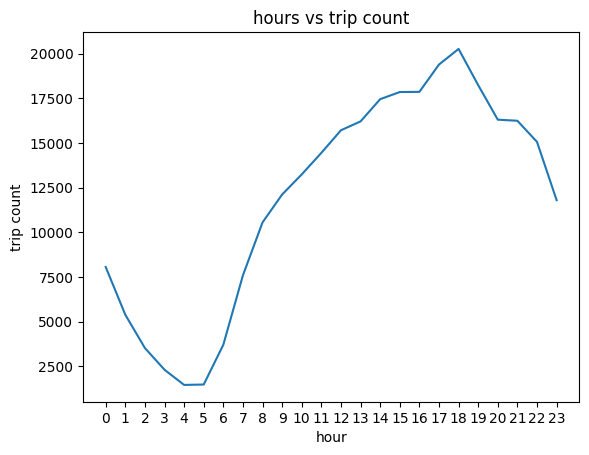

In [ ]:
# Find and show the hourly trends in taxi pickups
df.groupby('hour')['tpep_pickup_datetime'].count().plot()
plt.xlabel('hour')
plt.ylabel('trip count')
plt.title('hours vs trip count')
plt.xticks(range(24))
plt.show()

After observing the above plot, We can conclude that the booking are very often after 8.00 AM. This may be because of moving crowd in the day time ,rather than night time. And also we can see that the number of rides increasing from 8.00AM to 6.00PM and gradually decreased.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286180 entries, 0 to 286179
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  286180 non-null  int64         
 1   VendorID               286180 non-null  int64         
 2   tpep_pickup_datetime   286180 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  286180 non-null  datetime64[ns]
 4   passenger_count        286180 non-null  float64       
 5   trip_distance          286180 non-null  float64       
 6   RatecodeID             286180 non-null  float64       
 7   store_and_fwd_flag     286180 non-null  object        
 8   PULocationID           286180 non-null  int64         
 9   DOLocationID           286180 non-null  int64         
 10  payment_type           286180 non-null  int64         
 11  fare_amount            286180 non-null  float64       
 12  extra                  286180 non-null  floa

In [ ]:
df.date=pd.to_datetime(df.date)
df['weekdays']=df.date.dt.day_name()
df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1      1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2      2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3      3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4      4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              3.0           1.25         1.0                  N   
1              1.0           5.00         1.0                  N   
2              1.0          24.04         1.0                  N   
3              1.0           0.60         1.0                  N   
4              1.0           0.90         1.0                  N   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           234           114  ...      0.5        6.12           0.0   
1            48            87  ...      0.5        0.00           0.0   
2           114           121  ...      0.5        6.00           0.0   
3           246            68  ...      0.5        1.00           0.0   
4           114           148  ...      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         19.72                   2.5          0.0   
1                    1.0         28.30                   2.5          0.0   
2                    1.0        102.20                   2.5          0.0   
3                    1.0         11.80                   2.5          0.0   
4                    1.0         15.45                   2.5          0.0   

        date  hour   weekdays  
0 2023-02-01     0  Wednesday  
1 2023-02-01     0  Wednesday  
2 2023-02-01     0  Wednesday  
3 2023-02-01     0  Wednesday  
4 2023-02-01     0  Wednesday  

[5 rows x 23 columns]

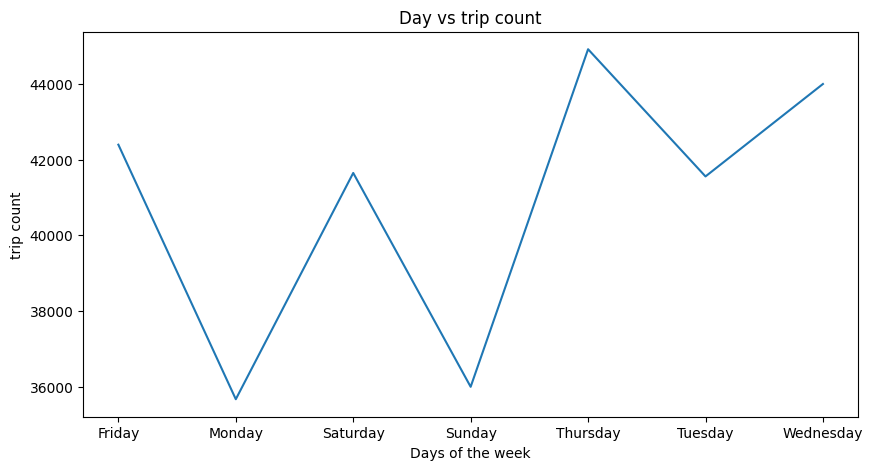

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10,5))
df.groupby('weekdays')['tpep_pickup_datetime'].count().plot()
plt.xlabel('Days of the week')
plt.ylabel('trip count')
plt.title('Day vs trip count')

plt.show()

From the above output , We can see that there are less number of bookings on weekend and week start and more bookings on remaining days. This may be because of people are tired throughout week and taking rest on weekends.

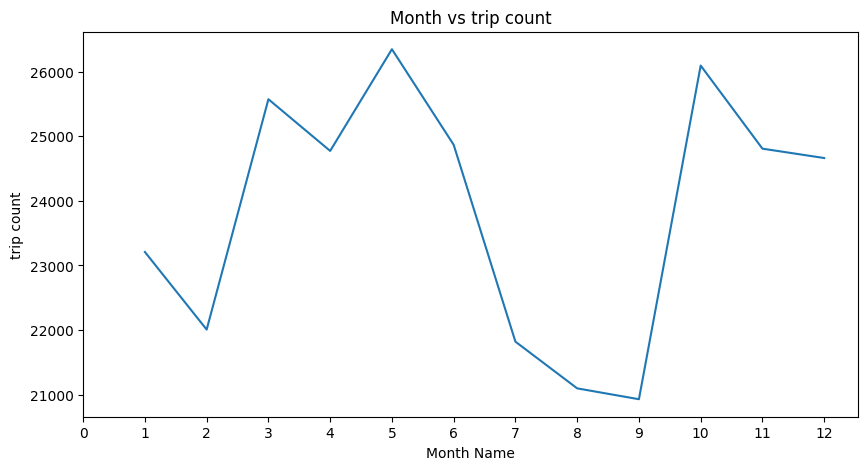

In [ ]:
# Show the monthly trends in pickups
plt.figure(figsize=(10,5))
df['month']=df.date.dt.month
df.groupby('month')['tpep_pickup_datetime'].count().plot()
plt.xlabel('Month Name')
plt.ylabel('trip count')
plt.title('Month vs trip count')
plt.xticks(range(13))
plt.show()

From the above plot we can see that more number of trips are observed in May and very less in september.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
df[df.trip_distance<0]
#As we already cleaned up the data , So there are no rows with negative values for the above parameters

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour, weekdays, month]
Index: []

[0 rows x 24 columns]

As we already cleaned up the data , So there are no rows with negative values for the above parameters

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
df1=df.copy()
df1.describe()

index       VendorID           tpep_pickup_datetime  \
count  286180.000000  286180.000000                         286180   
mean   143089.500000       1.753760  2023-07-01 23:05:04.386019072   
min         0.000000       1.000000            2023-01-01 00:04:34   
25%     71544.750000       2.000000            2023-04-01 21:33:52   
50%    143089.500000       2.000000     2023-06-26 10:35:44.500000   
75%    214634.250000       2.000000            2023-10-05 21:30:33   
max    286179.000000       2.000000            2023-12-31 23:54:03   
std     82613.194356       0.430821                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                         286180    286180.000000  286180.000000   
mean   2023-07-01 23:22:15.565584896         1.391296       3.429697   
min              2023-01-01 00:09:40         1.000000       0.000000   
25%    2023-04-01 21:51:23.750000128         1.000000       1.060000   
50%              2023-06-26 10:54:01         1.000000       1.790000   
75%              2023-10-05 21:46:42         1.000000       3.350000   
max              2024-01-01 20:14:57         6.000000     187.350000   
std                              NaN         0.882384       4.510793   

          RatecodeID   PULocationID   DOLocationID   payment_type  ...  \
count  286180.000000  286180.000000  286180.000000  286180.000000  ...   
mean        1.073877     165.594783     164.312761       1.205304  ...   
min         1.000000       1.000000       1.000000       1.000000  ...   
25%         1.000000     132.000000     114.000000       1.000000  ...   
50%         1.000000     162.000000     162.000000       1.000000  ...   
75%         1.000000     234.000000     234.000000       1.000000  ...   
max         5.000000     265.000000     265.000000       4.000000  ...   
std         0.390431      63.614876      69.664912       0.465648  ...   

             mta_tax     tip_amount  tolls_amount  improvement_surcharge  \
count  286180.000000  286180.000000  286180.00000          286180.000000   
mean        0.495554       3.575691       0.58412               0.999519   
min         0.000000       0.000000       0.00000               0.000000   
25%         0.500000       1.000000       0.00000               1.000000   
50%         0.500000       2.860000       0.00000               1.000000   
75%         0.500000       4.470000       0.00000               1.000000   
max         0.800000     103.840000      36.69000               1.000000   
std         0.047008       3.923322       2.11589               0.019664   

        total_amount  congestion_surcharge    Airport_fee  \
count  286180.000000         286180.000000  286180.000000   
mean       28.814930              2.323590       0.143709   
min         1.010000              0.000000       0.000000   
25%        15.960000              2.500000       0.000000   
50%        21.000000              2.500000       0.000000   
75%        30.600000              2.500000       0.000000   
max       488.700000              2.500000       1.750000   
std        22.740142              0.640239       0.465761   

                                date           hour          month  
count                         286180  286180.000000  286180.000000  
mean   2023-07-01 08:15:26.454679040      14.326068       6.511937  
min              2023-01-01 00:00:00       0.000000       1.000000  
25%              2023-04-01 00:00:00      11.000000       4.000000  
50%              2023-06-26 00:00:00      15.000000       6.000000  
75%              2023-10-05 00:00:00      19.000000      10.000000  
max              2023-12-31 00:00:00      23.000000      12.000000  
std                              NaN       5.782011       3.463500  

[8 rows x 22 columns]

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
#df1=df1[df1.total_amount>0]

df1[df1.fare_amount<=0]

Empty DataFrame
Columns: [index, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour, weekdays, month]
Index: []

[0 rows x 24 columns]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

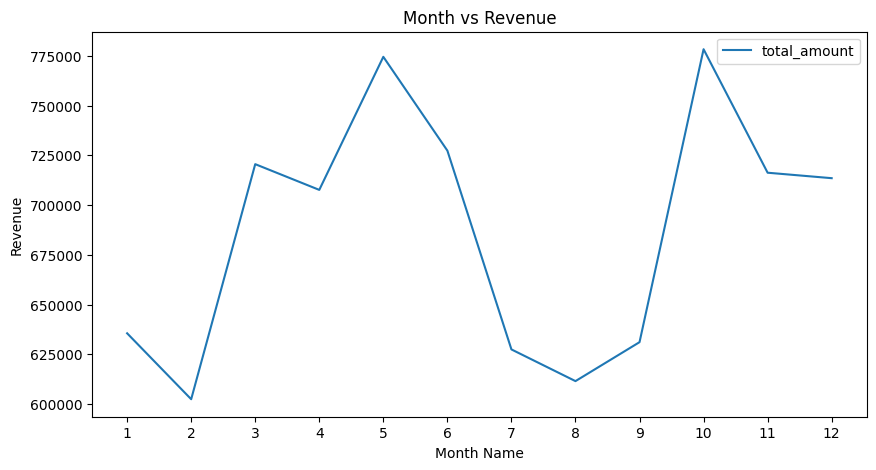

In [ ]:
# Group data by month and analyse monthly revenue
plt.figure(figsize=(10,5))
df1.groupby('month')['total_amount'].sum().plot()
plt.xlabel('Month Name')
plt.ylabel('Revenue')
plt.title('Month vs Revenue')
plt.xticks(range(1,13))
plt.legend()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

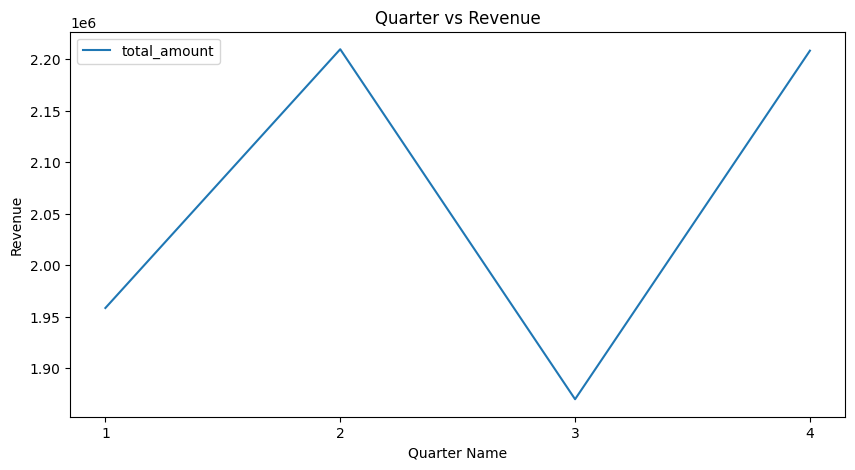

In [ ]:
# Calculate proportion of each quarter
plt.figure(figsize=(10,5))
df1['quarter']=df1.date.dt.quarter
df1.groupby('quarter')['total_amount'].sum().plot()
plt.xlabel('Quarter Name')
plt.ylabel('Revenue')
plt.xticks(range(1,5))
plt.title('Quarter vs Revenue')
plt.legend()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

               trip_distance  fare_amount
trip_distance       1.000000     0.911497
fare_amount         0.911497     1.000000


<Axes: >

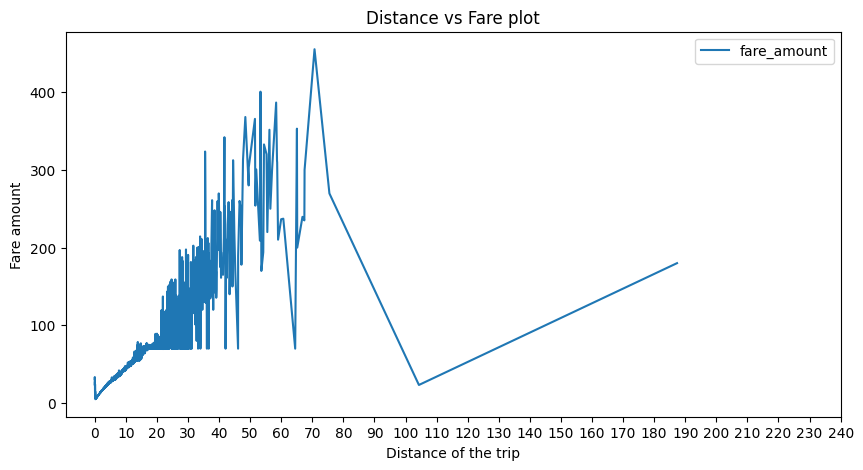

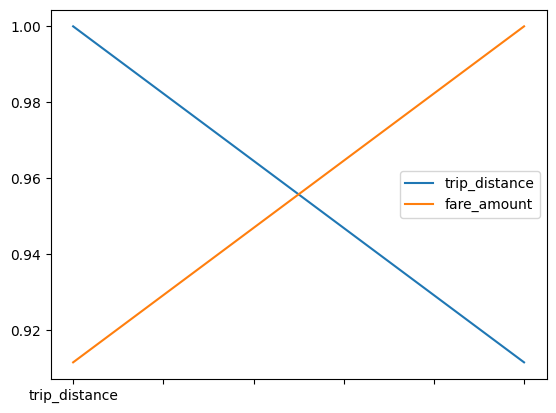

In [ ]:
# Visualise the relationship between trip_distance and fare_amount. Also find the correlation value for these two.
# Show how trip fare is affected by distance
plt.figure(figsize=(10,5))
df1.groupby('trip_distance')['fare_amount'].mean().plot()
plt.xlabel('Distance of the trip')
plt.ylabel('Fare amount')
plt.title('Distance vs Fare plot')
plt.xticks(range(0,250,10))
plt.legend()
print(df1[['trip_distance','fare_amount']].corr())
df1[['trip_distance','fare_amount']].corr().plot()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration
df1.tpep_pickup_datetime=pd.to_datetime(df1.tpep_pickup_datetime)
df1.tpep_dropoff_datetime=pd.to_datetime(df1.tpep_dropoff_datetime)
df1['trip_duration']=(df1.tpep_dropoff_datetime-df1.tpep_pickup_datetime).dt.total_seconds()
df1.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1      1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2      2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3      3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4      4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              3.0           1.25         1.0                  N   
1              1.0           5.00         1.0                  N   
2              1.0          24.04         1.0                  N   
3              1.0           0.60         1.0                  N   
4              1.0           0.90         1.0                  N   

   PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0           234           114  ...                    1.0         19.72   
1            48            87  ...                    1.0         28.30   
2           114           121  ...                    1.0        102.20   
3           246            68  ...                    1.0         11.80   
4           114           148  ...                    1.0         15.45   

   congestion_surcharge  Airport_fee       date  hour   weekdays  month  \
0                   2.5          0.0 2023-02-01     0  Wednesday      2   
1                   2.5          0.0 2023-02-01     0  Wednesday      2   
2                   2.5          0.0 2023-02-01     0  Wednesday      2   
3                   2.5          0.0 2023-02-01     0  Wednesday      2   
4                   2.5          0.0 2023-02-01     0  Wednesday      2   

   quarter  trip_duration  
0        1          346.0  
1        1         1144.0  
2        1         2680.0  
3        1          227.0  
4        1          360.0  

[5 rows x 26 columns]

In [ ]:
df1[df1.trip_duration>8000]

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
310        310         2  2023-02-01 13:59:37   2023-02-02 13:57:41   
2039      2039         1  2023-02-03 14:04:08   2023-02-03 17:12:48   
2276      2276         2  2023-02-03 18:13:18   2023-02-04 17:21:22   
2727      2727         2  2023-02-04 11:31:57   2023-02-05 10:49:59   
5728      5728         2  2023-02-08 14:38:27   2023-02-08 17:03:05   
...        ...       ...                  ...                   ...   
283245  283245         2  2023-11-27 17:56:59   2023-11-28 17:47:35   
283254  283254         2  2023-11-27 17:41:23   2023-11-28 17:22:51   
284338  284338         2  2023-11-28 22:54:25   2023-11-29 22:40:14   
284559  284559         2  2023-11-29 10:56:06   2023-11-30 10:54:50   
285718  285718         2  2023-11-30 16:17:21   2023-12-01 16:05:51   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
310                 3.0           1.26         1.0                  N   
2039                1.0          15.00         1.0                  N   
2276                1.0           0.87         1.0                  N   
2727                2.0           2.91         1.0                  N   
5728                1.0          12.60         1.0                  N   
...                 ...            ...         ...                ...   
283245              1.0           0.92         1.0                  N   
283254              2.0           3.23         1.0                  N   
284338              1.0           2.11         1.0                  N   
284559              3.0           1.16         1.0                  N   
285718              1.0           0.54         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
310              230           246  ...                    1.0         12.60   
2039             157           157  ...                    1.0        171.60   
2276             114           249  ...                    1.0         15.30   
2727             162           114  ...                    1.0         28.00   
5728             224            95  ...                    1.0         66.75   
...              ...           ...  ...                    ...           ...   
283245           237            43  ...                    1.0         18.17   
283254           261           148  ...                    1.0         25.08   
284338           163            68  ...                    1.0         21.38   
284559           140           236  ...                    1.0         16.80   
285718           237           237  ...                    1.0         13.70   

        congestion_surcharge  Airport_fee       date  hour   weekdays  month  \
310                      2.5          0.0 2023-02-01    13  Wednesday      2   
2039                     0.0          0.0 2023-02-03    14     Friday      2   
2276                     2.5          0.0 2023-02-03    18     Friday      2   
2727                     2.5          0.0 2023-02-04    11   Saturday      2   
5728                     2.5          0.0 2023-02-08    14  Wednesday      2   
...                      ...          ...        ...   ...        ...    ...   
283245                   2.5          0.0 2023-11-27    17     Monday     11   
283254                   2.5          0.0 2023-11-27    17     Monday     11   
284338                   2.5          0.0 2023-11-28    22    Tuesday     11   
284559                   2.5          0.0 2023-11-29    10  Wednesday     11   
285718                   2.5          0.0 2023-11-30    16   Thursday     11   

        quarter  trip_duration  
310           1        86284.0  
2039          1        11320.0  
2276          1        83284.0  
2727          1        83882.0  
5728          1         8678.0  
...         ...            ...  
283245        4        85836.0  
283254        4        85288.0  
284338        4        85549.0  
284559        4        8632

               trip_duration  fare_amount
trip_duration       1.000000     0.265741
fare_amount         0.265741     1.000000


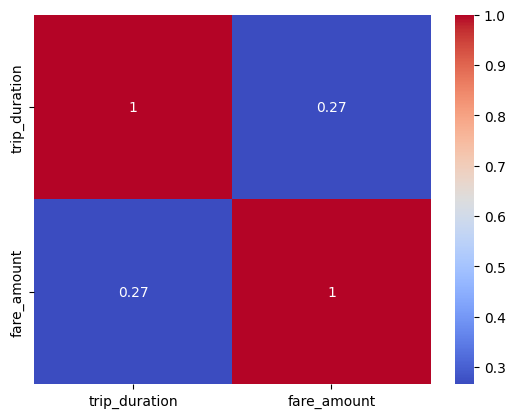

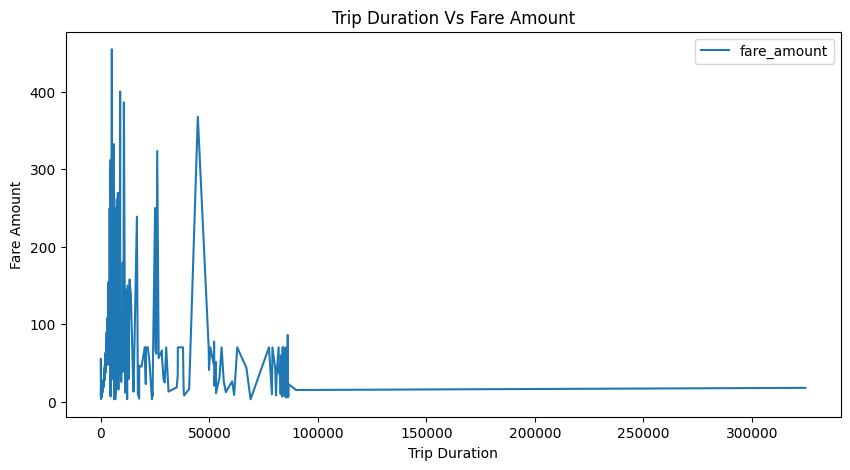

In [ ]:
print(df1[['trip_duration','fare_amount']].corr())
sns.heatmap(df1[['trip_duration','fare_amount']].corr(),annot=True,cmap='coolwarm')
plt.show()
plt.figure(figsize=(10,5))
df1.groupby('trip_duration')['fare_amount'].mean().plot()
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.title("Trip Duration Vs Fare Amount")
plt.legend()

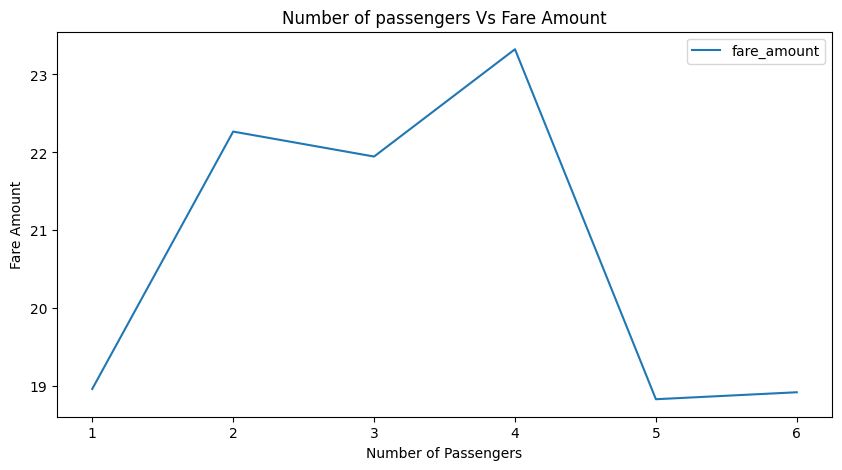

In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10,5))
df1.groupby('passenger_count')['fare_amount'].mean().plot()
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.title("Number of passengers Vs Fare Amount")
plt.legend()

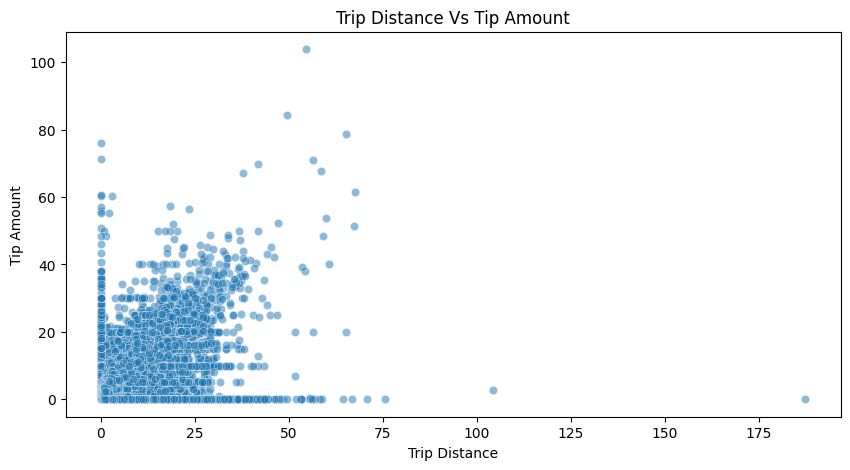

In [ ]:
# Show relationship between tip and trip distance
#df1.groupby('trip_distance')['tip_amount'].mean().plot()
plt.figure(figsize=(10,5))
sns.scatterplot(data=df1,x='trip_distance',y='tip_amount',alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title("Trip Distance Vs Tip Amount")
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

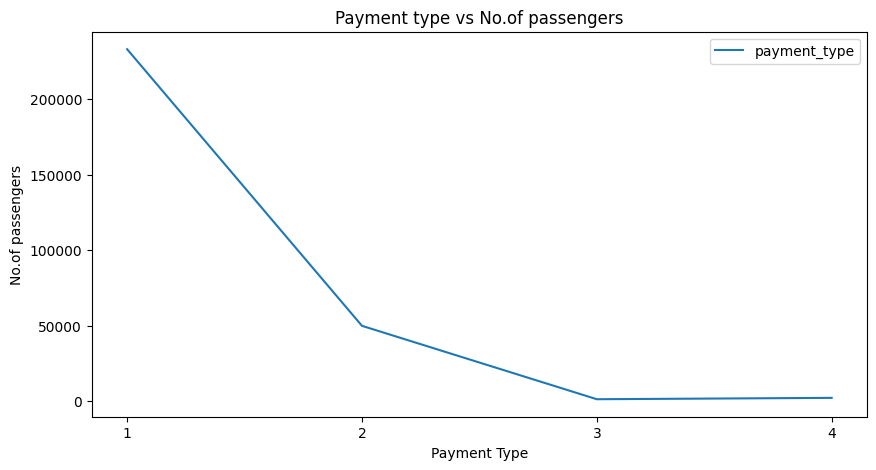

In [ ]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(10,5))
df1.groupby('payment_type')['payment_type'].count().plot()
plt.xlabel('Payment Type')
plt.ylabel('No.of passengers')
plt.title("Payment type vs No.of passengers")
plt.xticks(range(1,5))
plt.legend()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas
!pip install geopandas


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/My Drive/SHAPE FILE/taxi_zones.shp')

# Display the GeoDataFrame
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


Text(0.5, 1.0, 'NYC Taxi zones map')

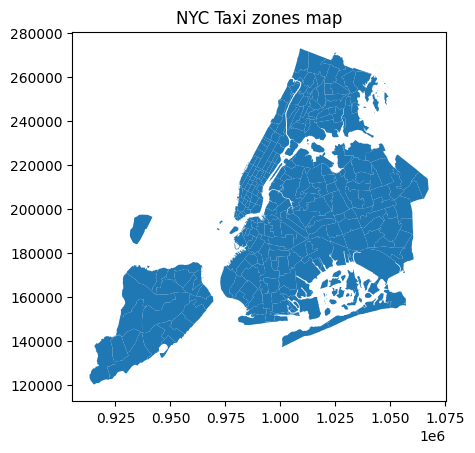

In [ ]:
# print(zones.info())
print(zones.info())
# zones.plot()
zones.plot()
plt.title('NYC Taxi zones map')

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
df1.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1      1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2      2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3      3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4      4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              3.0           1.25         1.0                  N   
1              1.0           5.00         1.0                  N   
2              1.0          24.04         1.0                  N   
3              1.0           0.60         1.0                  N   
4              1.0           0.90         1.0                  N   

   PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0           234           114  ...                    1.0         19.72   
1            48            87  ...                    1.0         28.30   
2           114           121  ...                    1.0        102.20   
3           246            68  ...                    1.0         11.80   
4           114           148  ...                    1.0         15.45   

   congestion_surcharge  Airport_fee       date  hour   weekdays  month  \
0                   2.5          0.0 2023-02-01     0  Wednesday      2   
1                   2.5          0.0 2023-02-01     0  Wednesday      2   
2                   2.5          0.0 2023-02-01     0  Wednesday      2   
3                   2.5          0.0 2023-02-01     0  Wednesday      2   
4                   2.5          0.0 2023-02-01     0  Wednesday      2   

   quarter  trip_duration  
0        1          346.0  
1        1         1144.0  
2        1         2680.0  
3        1          227.0  
4        1          360.0  

[5 rows x 26 columns]

In [ ]:
# Merge zones and trip records using locationID and PULocationID
df_shp=pd.merge(df1,zones,left_on='PULocationID',right_on='LocationID',how='left')
df_shp.head()


index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1      1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2      2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3      3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4      4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              3.0           1.25         1.0                  N   
1              1.0           5.00         1.0                  N   
2              1.0          24.04         1.0                  N   
3              1.0           0.60         1.0                  N   
4              1.0           0.90         1.0                  N   

   PULocationID  DOLocationID  ...  month  quarter  trip_duration  OBJECTID  \
0           234           114  ...      2        1          346.0     234.0   
1            48            87  ...      2        1         1144.0      48.0   
2           114           121  ...      2        1         2680.0     114.0   
3           246            68  ...      2        1          227.0     246.0   
4           114           148  ...      2        1          360.0     114.0   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.036072    0.000073                   Union Sq       234.0  Manhattan   
1    0.043747    0.000094               Clinton East        48.0  Manhattan   
2    0.031727    0.000047    Greenwich Village South       114.0  Manhattan   
3    0.069467    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
4    0.031727    0.000047    Greenwich Village South       114.0  Manhattan   

                                            geometry  
0  POLYGON ((987029.847 207022.299, 987048.27 206...  
1  POLYGON ((986694.313 214463.846, 986568.184 21...  
2  POLYGON ((986306.712 203122.786, 986300.242 20...  
3  POLYGON ((983031.177 217138.506, 983640.32 216...  
4  POLYGON ((986306.712 203122.786, 986300.242 20...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
#df_shp1=df_shp.groupby('geometry')
#df_shp1.head()
df_grouped=df_shp.groupby('LocationID')['trip_distance'].count()
df_grouped.rename('trip_count',inplace=True)
df_grouped.head()

LocationID
1.0     40
3.0      1
4.0    275
6.0      3
7.0    122
Name: trip_count, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
df_final=pd.merge(zones,df_grouped,left_on='LocationID',right_on='LocationID',how='left')
df_final.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        40.0  
1         NaN  
2         1.0  
3       275.0  
4         NaN

In [ ]:
df_final[df_final.LocationID==1].head()

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID borough  \
0         1    0.116357    0.000782  Newark Airport           1     EWR   

                                            geometry  trip_count  
0  POLYGON ((933100.918 192536.086, 933091.011 19...        40.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

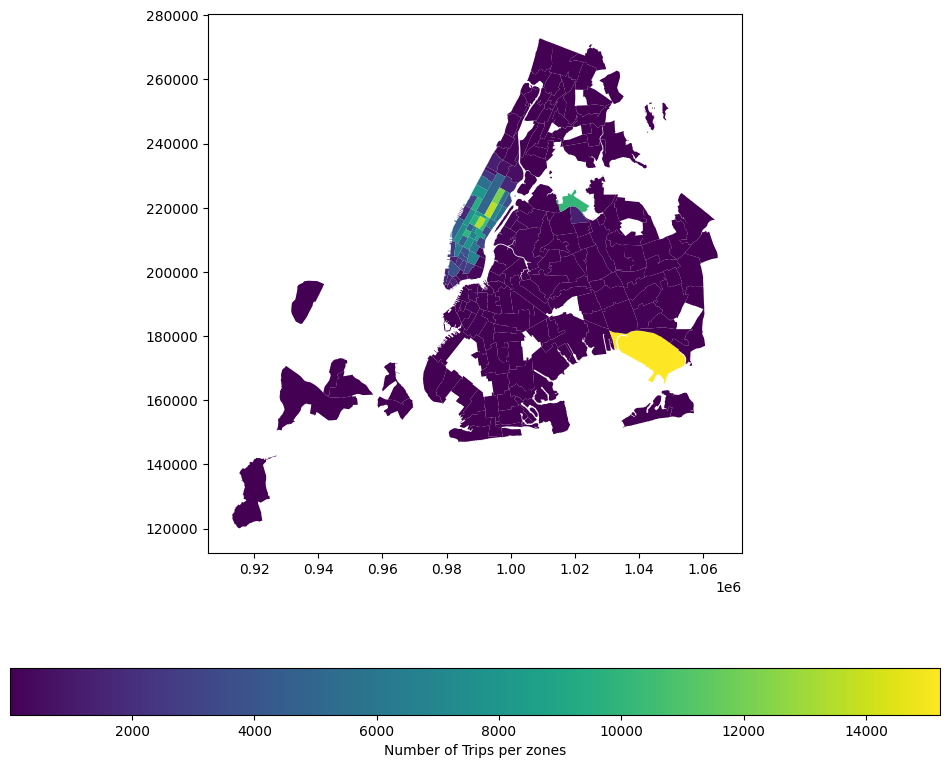

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
df_final.plot(column='trip_count', ax = ax,legend=True,legend_kwds={'label': "Number of Trips per zones", 'orientation': "horizontal"})
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
df_final.sort_values(by='trip_count',ascending=False,inplace=True)
df_final.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  trip_count  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...     15212.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...     13602.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...     13466.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...     12135.0  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...     10441.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

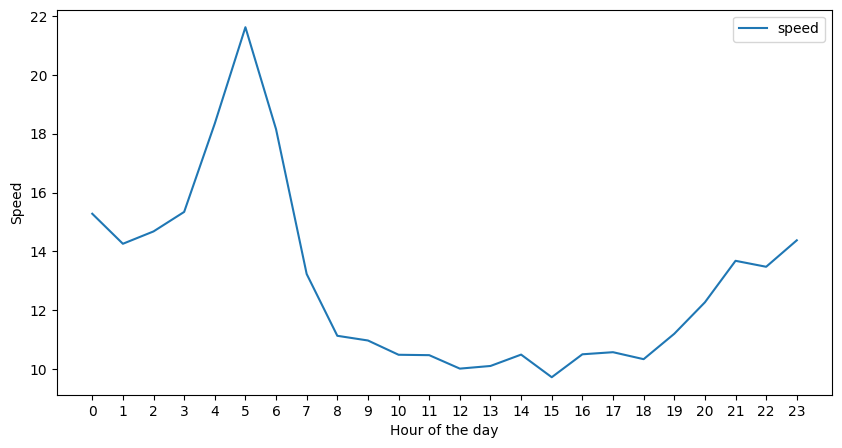

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df2=df1.copy()
df2["speed"]=df2.trip_distance/(df2.trip_duration/3600)
df2.head()
plt.figure(figsize=(10,5))
df2.groupby('hour')['speed'].mean().plot()
plt.xlabel('Hour of the day')
plt.ylabel('Speed')
plt.xticks(range(24))
plt.legend()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

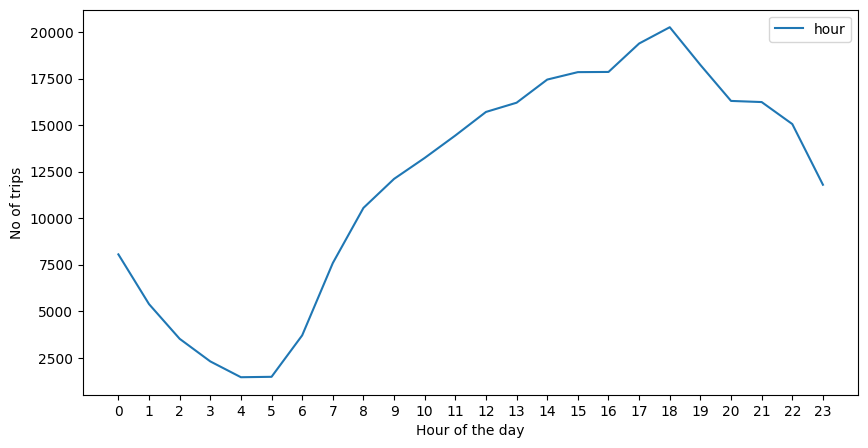

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(10,5))
df2.groupby('hour')['hour'].count().plot()
plt.xlabel("Hour of the day")
plt.ylabel("No of trips")
plt.xticks(range(24))
plt.legend()


The maximum number of trips booked and completed at evening 6.00 PM or 18.00.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [ ]:
df2.groupby('hour')['hour'].count()


hour
0      8056
1      5384
2      3520
3      2305
4      1455
5      1477
6      3704
7      7589
8     10552
9     12112
10    13238
11    14443
12    15709
13    16205
14    17448
15    17848
16    17858
17    19386
18    20261
19    18234
20    16301
21    16240
22    15058
23    11797
Name: hour, dtype: int64

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 125
df2.groupby('hour')['hour'].count()*sample_fraction



hour
0     1007000
1      673000
2      440000
3      288125
4      181875
5      184625
6      463000
7      948625
8     1319000
9     1514000
10    1654750
11    1805375
12    1963625
13    2025625
14    2181000
15    2231000
16    2232250
17    2423250
18    2532625
19    2279250
20    2037625
21    2030000
22    1882250
23    1474625
Name: hour, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

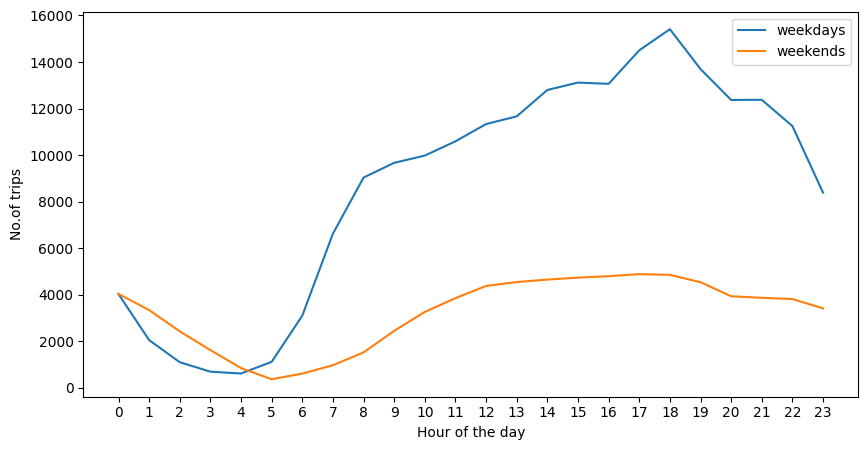

In [ ]:
# Compare traffic trends for the week days and weekends
weekdays_data=df2[df2['weekdays'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
weekends_data=df2[df2.weekdays.isin(['Saturday','Sunday'])]
plt.figure(figsize=(10,5))
weekdays_data.groupby('hour')['hour'].count().plot(legend=True,label='weekdays')
weekends_data.groupby('hour')['hour'].count().plot(legend=True,label="weekends")
plt.xlabel('Hour of the day')
plt.ylabel('No.of trips')
plt.xticks(range(24))
plt.legend()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

# Top 10 Pickup Zones
top_pickup_zones = df['PULocationID'].value_counts().nlargest(10).index.tolist()
print("Top 10 Pickup Zones:", top_pickup_zones)

# Top 10 Dropoff Zones
top_dropoff_zones = df['DOLocationID'].value_counts().nlargest(10).index.tolist()
print("Top 10 Dropoff Zones:", top_dropoff_zones)

Top 10 Pickup Zones: [132, 237, 161, 236, 162, 138, 186, 230, 142, 170]
Top 10 Dropoff Zones: [236, 237, 161, 230, 170, 162, 142, 239, 141, 68]


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()
ratio_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})
ratio_df['ratio'] = ratio_df['pickup_count'] / ratio_df['dropoff_count']
# Handle potential division by zero (replace inf with NaN)
ratio_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Sort by ratio to find the highest and lowest
ratio_df.sort_values(by='ratio', ascending=False, inplace=True)

# Display the 10 highest and 10 lowest ratios
print("10 Highest Pickup/Dropoff Ratios:")
print(ratio_df.head(10))


print("\n10 Lowest Pickup/Dropoff Ratios:")
print(ratio_df.tail(10))

10 Highest Pickup/Dropoff Ratios:
     pickup_count  dropoff_count     ratio
70         1331.0            156  8.532051
132       15212.0           3239  4.696511
138       10058.0           3458  2.908618
186        9872.0           6453  1.529831
43         4887.0           3545  1.378561
249        6389.0           4708  1.357052
114        3705.0           2759  1.342878
162       10441.0           8247  1.266036
161       13466.0          11286  1.193160
100        4720.0           3969  1.189216

10 Lowest Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  ratio
183           NaN              8    NaN
184           NaN              2    NaN
201           NaN             20    NaN
204           NaN              3    NaN
206           NaN              4    NaN
214           NaN              3    NaN
227           NaN             41    NaN
245           NaN              6    NaN
248           NaN             26    NaN
252           NaN             57    NaN


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df3=df2[(df2.hour>=23) | (df2.hour<=5)]
pickup_counts = df3['PULocationID'].value_counts()
dropoff_counts = df3['DOLocationID'].value_counts()
night_df = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})
night_df.sort_values(by='pickup_count', ascending=False, inplace=True)
print("High pickup location during night hours are : ")
print(night_df.head(10))
night_df.sort_values(by='dropoff_count', ascending=False, inplace=True)
print("High dropoff location during night hours are : ")
print(night_df.head(10))

High pickup location during night hours are : 
     pickup_count  dropoff_count
79         2455.0         1327.0
132        2294.0          299.0
249        1992.0          737.0
48         1635.0         1122.0
148        1534.0          699.0
230        1342.0          707.0
114        1330.0          392.0
186        1108.0          612.0
138         983.0          316.0
164         959.0          623.0
High dropoff location during night hours are : 
     pickup_count  dropoff_count
79         2455.0         1327.0
48         1635.0         1122.0
170         627.0          991.0
68          927.0          938.0
107         930.0          931.0
141         556.0          851.0
263         546.0          804.0
249        1992.0          737.0
90          763.0          714.0
236         308.0          708.0


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
night_df = df2[(df2.hour >= 23) | (df2.hour <= 5)]
day_df=df2[(df2.hour>=6) & (df2.hour<=22)]
print("Revenue during night time is : ")
print(night_df.total_amount.sum())
print("Revenue during day time is : ")
print(day_df.total_amount.sum())
print("Total revenue is : ")
print(df2.total_amount.sum())


Revenue during night time is : 
1005499.0099999999
Revenue during day time is : 
7240757.579999999
Total revenue is : 
8246256.589999999


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
df2.groupby('passenger_count')['fare_amount'].sum()/df2.groupby('passenger_count')['trip_distance'].sum()


passenger_count
1.0    5.811945
2.0    5.454745
3.0    5.643223
4.0    5.862555
5.0    5.679351
6.0    5.633976
dtype: float64

Faring is not woking like that here, Irrespective of the passengers in the taxi, Fare per mmile is almost same.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
print("Fare per mile according to the time of the day is :")
print(df2.groupby('hour')['fare_amount'].sum()/df2.groupby('hour')['trip_distance'].sum())
print("Fare per mile according to the days of the week is :")
print(df2.groupby('weekdays')['fare_amount'].sum()/df2.groupby('weekdays')['trip_distance'].sum())


Fare per mile according to the time of the day is :
hour
0     5.192490
1     5.368177
2     5.413738
3     5.241390
4     5.033159
5     4.607090
6     4.768964
7     5.312776
8     5.837110
9     5.922984
10    6.047349
11    6.131684
12    6.149355
13    5.952263
14    5.929048
15    5.983359
16    6.047254
17    6.130888
18    6.108167
19    5.711424
20    5.452035
21    5.400423
22    5.322246
23    5.116080
dtype: float64
Fare per mile according to the days of the week is :
weekdays
Friday       5.799107
Monday       5.445181
Saturday     5.819814
Sunday       5.319433
Thursday     5.956304
Tuesday      5.860096
Wednesday    5.930467
dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors
print("Fare per mile according to the vendors is :")
print(df2.groupby('VendorID')['fare_amount'].sum()/df2.groupby('VendorID')['trip_distance'].sum())


Fare per mile according to the vendors is :
VendorID
1    5.785831
2    5.722986
dtype: float64


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers
df_2_miles = df2[df2['trip_distance'] <= 2]
df_2_to_5_miles = df2[(df2['trip_distance'] > 2) & (df2['trip_distance'] <= 5)]
df_5_miles_plus = df2[df2['trip_distance'] > 5]
print("Fare per mile for distances upto 2 miles is :")
print(df_2_miles.groupby('VendorID')['fare_amount'].sum()/df_2_miles.groupby('VendorID')['trip_distance'].sum())
print("Fare per mile for distances between 2 to 5 miles is :")
print(df_2_to_5_miles.groupby('VendorID')['fare_amount'].sum()/df_2_to_5_miles.groupby('VendorID')['trip_distance'].sum())
print("Fare per mile for distances more than 5 miles is :")
print(df_5_miles_plus.groupby('VendorID')['fare_amount'].sum()/df_5_miles_plus.groupby('VendorID')['trip_distance'].sum())

Fare per mile for distances upto 2 miles is :
VendorID
1    9.078315
2    9.489273
dtype: float64
Fare per mile for distances between 2 to 5 miles is :
VendorID
1    6.235732
2    6.412886
dtype: float64
Fare per mile for distances more than 5 miles is :
VendorID
1    4.275017
2    4.304593
dtype: float64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df2['tip_percentage'] = (df2['tip_amount'] / df2['fare_amount']) * 100
print("No. of passengers relation with tip percentage is :")
print(df2.groupby('passenger_count')['tip_percentage'].mean())
print("Hour of the day relation with tip percentage is :")
print(df2.groupby('hour')['tip_percentage'].mean())
print("Trip distance relation with tip percentage is :")
print(df2.groupby('trip_distance')['tip_percentage'].mean())



No. of passengers relation with tip percentage is :
passenger_count
1.0    20.508578
2.0    19.444165
3.0    18.632987
4.0    16.987647
5.0    20.709509
6.0    20.648072
Name: tip_percentage, dtype: float64
Hour of the day relation with tip percentage is :
hour
0     20.224423
1     20.530480
2     19.768748
3     19.207946
4     16.995604
5     17.493373
6     18.727393
7     19.479122
8     19.907949
9     19.573832
10    19.201901
11    19.015403
12    18.955142
13    18.838623
14    18.928887
15    18.748779
16    20.741148
17    21.537312
18    22.005050
19    21.973453
20    21.117146
21    21.389306
22    21.056985
23    20.294224
Name: tip_percentage, dtype: float64
Trip distance relation with tip percentage is :
trip_distance
0.00       9.570507
0.01       4.207738
0.02       4.943110
0.03       4.813880
0.04       6.686192
            ...    
67.51     20.503333
70.71      0.000000
75.50      0.000000
104.30    11.716738
187.35     0.083333
Name: tip_percentage, Length: 2941,

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_df = df2[df2['tip_percentage'] < 10]
high_tip_df = df2[df2['tip_percentage'] > 25]
print(low_tip_df.head())
print(high_tip_df.head())

    index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
1       1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2       2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
10     10         2  2023-02-01 00:13:46   2023-02-01 00:17:37   
14     14         2  2023-02-01 01:52:26   2023-02-01 02:02:43   
20     20         1  2023-02-01 03:05:11   2023-02-01 03:10:21   

    passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
1               1.0           5.00         1.0                  N   
2               1.0          24.04         1.0                  N   
10              1.0           0.71         1.0                  N   
14              1.0           2.73         1.0                  N   
20              1.0           1.20         1.0                  N   

    PULocationID  DOLocationID  ...  congestion_surcharge  Airport_fee  \
1             48            87  ...                   2.5          0.0   
2            114           121  ...     

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

hour  weekdays 
0     Friday       1.371632
      Monday       1.341176
      Saturday     1.464304
      Sunday       1.451848
      Thursday     1.338219
                     ...   
23    Saturday     1.552777
      Sunday       1.442545
      Thursday     1.367179
      Tuesday      1.365398
      Wednesday    1.384381
Name: passenger_count, Length: 168, dtype: float64


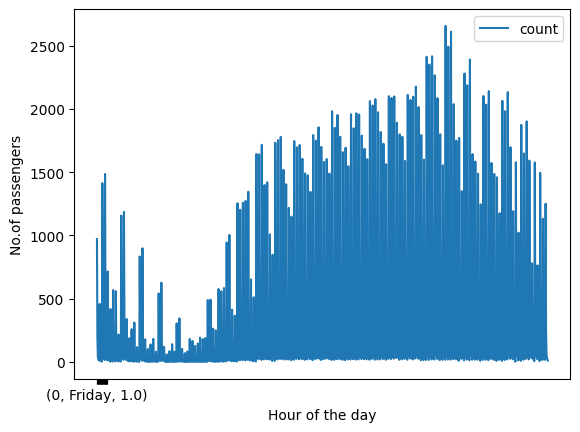

In [ ]:
# See how passenger count varies across hours and days
print(df2.groupby(['hour','weekdays'])['passenger_count'].mean())
df2.groupby(['hour','weekdays'])['passenger_count'].value_counts().plot()
plt.xlabel('Hour of the day')
plt.ylabel('No.of passengers')
plt.xticks(range(24))
plt.legend()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

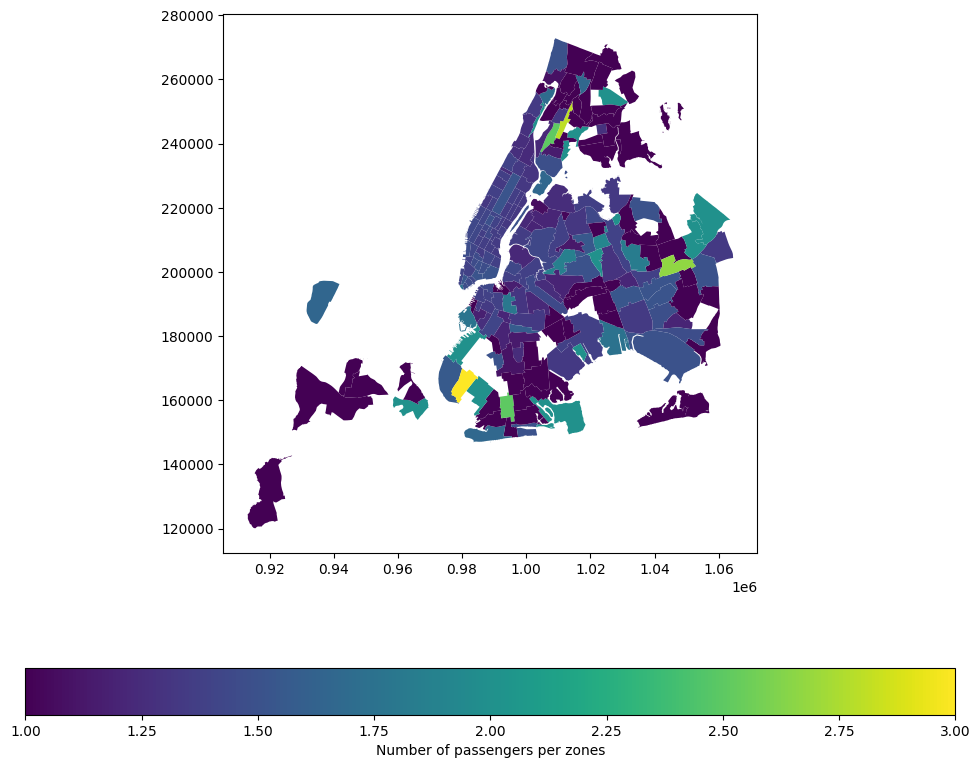

In [ ]:
# How does passenger count vary across zones
df_1=df2.groupby('PULocationID')['passenger_count'].mean()
df_2=pd.merge(zones,df_1,left_on='LocationID',right_on='PULocationID',how='left')
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
df_2.plot(column='passenger_count', ax = ax,legend=True,legend_kwds={'label': "Number of passengers per zones", 'orientation': "horizontal"})
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

# List of surcharge-related columns in the dataset
surcharge_columns = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Count occurrences of each surcharge being applied (values > 0)
surcharge_counts = {col: (df2[col] > 0).sum() for col in surcharge_columns}

# Convert to DataFrame for better visualization
surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=['Surcharge Type', 'Occurrences'])

# Calculate percentage of trips where each surcharge is applied
total_trips = len(df)
surcharge_df['Applied in (%)'] = (surcharge_df['Occurrences'] / total_trips) * 100

# Print results
print("Surcharge Application Frequency:")
print(surcharge_df)

Surcharge Application Frequency:
          Surcharge Type  Occurrences  Applied in (%)
0                  extra       176575       61.700678
1                mta_tax       283634       99.110350
2           tolls_amount        22969        8.026068
3  improvement_surcharge       286132       99.983227
4   congestion_surcharge       265986       92.943602
5            Airport_fee        25320        8.847578


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
To enhance routing and dispatching efficiency while addressing demand patterns and operational issues, consider the following recommendations:

Demand Analysis:
   Use historical data to predict peak demand periods and locations, allowing you to adjust routes accordingly.

Dynamic Routing:
  Implement real-time route optimization using GPS and traffic data to minimize delays and fuel consumption.

Load Balancing:
  Distribute workloads evenly among vehicles to prevent over-utilization or under-utilization.

Automated Dispatching:
  Integrate AI-driven dispatch systems to allocate resources based on demand trends and availability.

Driver Training:
  Educate drivers on adaptive routing strategies and encourage proactive communication regarding operational obstacles.

Monitor Inefficiencies:
  Regularly review metrics like trip duration, idle times, and service delays to identify areas for improvement.

SyntaxError: invalid syntax (<ipython-input-106-75ecf36ffd17>, line 1)

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
STRATEGIC CAB POSITIONING BASED ON TRIP TRENDS
==============================================

1. TIME-OF-DAY STRATEGY
------------------------
6 AM – 10 AM:
  - Focus: Residential → Business Zones
  - Reason: Morning commuters

11 AM – 3 PM:
  - Focus: Tourist Attractions, Shopping Areas
  - Reason: Midday leisure travel

4 PM – 8 PM:
  - Focus: Business → Residential Zones
  - Reason: Evening return commutes

9 PM – 2 AM:
  - Focus: Nightlife Districts (e.g., LES, SoHo)
  - Reason: Entertainment and bar-hopping crowds

2. DAY-OF-WEEK STRATEGY
------------------------
Mon–Fri:
  - Focus: Business centers during the day, Residential zones at night
  - Reason: Standard work commute behavior

Friday PM:
  - Focus: Entertainment/nightlife zones
  - Reason: Start of weekend activity surge

Saturday–Sunday:
  - Focus: Parks, Malls, Airports, Nightlife Zones
  - Reason: Leisure, shopping, tourism trips

3. MONTHLY & SEASONAL STRATEGY
-------------------------------
Summer (June–August):
  - Focus: Hotels, Landmarks, Tourist Hotspots
  - Reason: Higher tourist activity

Winter Holidays (Nov–Dec):
  - Focus: Shopping districts (e.g., 5th Avenue)
  - Reason: Holiday shopping traffic

Rainy or Snowy Days:
  - Focus: Subway Exits, Transit Hubs
  - Reason: Demand for last-mile transport

Event Months (Marathon, Fashion Week, etc.):
  - Focus: Event Venues, Hotels
  - Reason: Localized surges in traffic

4. ZONE-LEVEL DEPLOYMENT STRATEGY
----------------------------------
- Place cabs in areas with consistent demand.
- Assign long-trip focused cabs to airports and stations.
- Keep short-trip cabs in commercial/tourist areas.

5. CAB POOLING OPTIMIZATION
----------------------------
- Promote shared rides in zones with frequent short trips.
- Reassign idle cabs from overserved areas to high-potential underserved zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
DATA-DRIVEN PRICING STRATEGY FOR MAXIMIZING REVENUE
====================================================

1. DYNAMIC PRICING BASED ON DEMAND
-----------------------------------
Goal: Maximize earnings during high-demand periods and incentivize rides during lulls.

- Identify peak demand hours (e.g., 7–10 AM, 5–8 PM, 9 PM–2 AM weekends).
- Apply time-based fare multipliers (e.g., 1.2x, 1.5x) during peak times.
- Use event calendars and weather conditions to trigger temporary surges.

2. ZONE-BASED PRICING TIERS
----------------------------
Goal: Optimize revenue based on location-specific demand.

- Set fixed surcharges for airport trips (e.g., $5 for JFK/LGA).
- Differentiate pricing in tourist-heavy vs residential zones.
- Encourage long-distance rides to outer boroughs with incentive-based pricing.

3. PASSENGER COUNT-BASED OPTIMIZATION
--------------------------------------
Goal: Monetize group rides effectively.

- Analyze fare-per-mile per passenger.
- Apply small surcharges for 3+ passengers.
- Offer solo rider discounts during off-peak hours to boost volume.

4. WEATHER-TRIGGERED ADJUSTMENTS
---------------------------------
Goal: Take advantage of increased demand during poor weather.

- Use real-time weather data to activate temporary fare increases.
- Target conditions like rain, snow, extreme heat, or cold.
- Combine with scarcity-based logic (e.g., low cab availability).

5. MINIMUM FARE OPTIMIZATION
-----------------------------
Goal: Ensure profitability for short trips.

- Set a minimum fare threshold based on operational costs.
- Offer ride bundles (e.g., two short rides for a discounted package).

6. OFF-PEAK DISCOUNTS
----------------------
Goal: Stimulate demand during low-traffic periods.

- Offer 10–15% discounts during:
  - Weekday afternoons (1–4 PM)
  - Late-night weekday hours
- Promote discounts through app banners or SMS.

7. SUBSCRIPTION & LOYALTY PROGRAMS
-----------------------------------
Goal: Retain high-frequency and high-value customers.

- Identify top 10% riders by frequency or value.
- Offer:
  - Ride credits
  - Monthly ride plans (e.g., 10 rides at a flat rate)
  - Referral bonuses

8. COMPETITOR PRICE BENCHMARKING
---------------------------------
Goal: Stay competitively priced without undercutting profits.

- Regularly compare fare rates with Uber, Lyft, and others.
- Benchmark:
  - Base fare
  - Per-mile and per-minute rates
  - Surge multipliers
- Adjust your pricing to stay within 10% range of market leaders.

SUMMARY TABLE
--------------
Strategy                      | Purpose                          | Data Input
------------------------------|-----------------------------------|-------------------------------
Dynamic Pricing               | Maximize revenue at peaks         | Hourly demand & events
Zone-Based Pricing            | Monetize high-traffic zones       | Trip origin/destination
Passenger-Based Optimization  | Capture value from group trips    | Passenger count analytics
Weather-Based Adjustments     | React to real-time conditions     | Weather + trip data
Minimum Fare Optimization     | Maintain short-trip profitability | Fare length analysis
Off-Peak Discounts            | Increase usage in quiet hours     | Time-of-day demand trends
Loyalty/Subscription Plans    | Retain top customers              | User frequency & spend
Competitor Benchmarking       | Maintain price competitiveness    | External pricing data
A/B Testing                   | Test & validate pricing models    | User behavior & revenue lift
